# The Neural Dynamics of Valence and Intensity Encoding in the Amygdala and Prefrontal Cortex

**Authors:** Rahim Hashim, Roberto Gulli, Stefano Fusi, Daniel Salzman <br>
**Notebook Owner:** Rahim Hashim (rh2898@columbia.edu) <br>
***

## Import Libraries and Setting Path Variables

Make sure that all the libraries specified in environment.yaml are installed (see [pip](https://packaging.python.org/en/latest/tutorials/installing-packages/) documentation for more info). 

**~The structure of the directory should be:~**
```
ROOT
│
└───data
│   │
│   └───raw
│   |   │   
│   │   └───data_<TASK>
│   │   │   
│   │   └───<MONKEY>_<YYYYMMDD>_g<d>             
│   │       │    
│   │       └───<MONKEY>_<YYYYMMDD>_g<d>_t<d>.meta
│   │       │    
│   │       └───<MONKEY>_<YYYYMMDD>_g<d>_t<d>.bin   
│   │ 
│   └───processed
│   │   │   
│   │   └───data_<TASK>
│   │ 
│   └───_fractals
│       │   
│       └─── <YYYYMMDD>
│
└─── tasks
    │
    └───<EXPERIMENT>
        │   
        └─── <TASK>  
            │   
            └───<videos>     

```

**MACBOOK:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

**PC:**
> **Raw Data Source:** `/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice` <br>
> **Raw Data Target:** '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice'

In [36]:
# Move files from acquisition computer to Google Drive
!bash utilities/move_files.sh

Current directory is:
  /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice
Target path is:
  data_Probabilistic_Reward_Airpuff_Choice/
Searching for Bear for 231012
  Moving : 231012_Bear_choice.h5
  Moved  : 231012_Bear_choice.h5
  Total number of files moved: 1
Fractal folder is: 20231012
  Copied fractal folder to all fractals folder
Done.


In [40]:
%load_ext autoreload
%autoreload 2
import os
import sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from pprint import pprint
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

# Custom classes
from classes.Session_Path import SessionPath
from classes.Session import Session
# pandas options
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)

# See tree branch above to set <ROOT>, <EXPERIMENT>
ROOT = '/Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/'
EXPERIMENT = 'rhAirpuff'
TASK = 'Probabilistic_Reward_Airpuff_Choice' # Probabalistic_Airpuff_4x2 | Probabilistic_Reward_Airpuff_5x2 | Probabilistic_Reward_Airpuff_Choice

path_obj = SessionPath(ROOT, EXPERIMENT, TASK)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Raw Data Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice
  Number of Total Files  : 131
  Monkey: Aragorn
    Number of Aragorn Files : 65
    Earliest Date    : 230523
    Most Recent Date : 231011
  Monkey: Bear
    Number of Bear Files : 52
    Earliest Date    : 230608
    Most Recent Date : 231012
Video Path Exists: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/tasks/rhAirpuff/8. Probabilistic_Reward_Airpuff_Choice/videos
Pulling '.h5' files...
  Complete: 123 '.h5' files pulled


***
## Specifying Session and Analyses Parameters
Choose the date(s) and monkey(s) that you'd like to include in your analysis. 
> `reprocess_data` <br>
> * `True` : generates (or regenerates) the session_df DataFrame from `data/raw` data <br>
> * `False` : loads the pickled session_df DataFrame from the `data/processed` data directory

> `save_df` <br>
> * `True` : pickles the generated session_df DataFrame and saves it in the `data/processed` data directory
> * `False` : does not pickle the session_df DataFrame

> `combine_dates` <br>
> * `True` : runs all analyses on a combined DataFrame and saves figures for all sessions
> * `False` : does not combine analyses and generates new figures for each date

In [41]:
# Custom modules
from config import preprocess_helper

# Specifying date/monkey/task
start_date = '2023-10-12' #@param {type:"date"}
end_date = '2023-10-12' #@param {type:"date"}
monkey_input = 'Bear' #@param ['Aragorn', 'Gandalf', 'Rob', 'Test']
reprocess_data = True #@param {type:"boolean"}
save_df =  True #@param {type:"boolean"}
combine_dates =  True #@param {type:"boolean"}

# Parse data
session_df, session_obj, error_dict, behavioral_code_dict\
	= preprocess_helper.preprocess_data(path_obj,
																			start_date,
																			end_date,
																			monkey_input,
																			TASK,
																			reprocess_data,
																			save_df,
																			combine_dates)

session_df_correct = session_df[session_df['correct'] == 1]

Loading selected file(s):
  231012_Bear_choice.h5 - Completed
Converting .h5 to python:
  <HDF5 file "231012_Bear_choice.h5" (mode r)>
Parsing .h5 file...
Total number of trials: 1051
  Choice task detected.
Parsing session data...


  0%|          | 0/1051 [00:00<?, ?it/s]

  Complete.
    Correct trials: 401
    Errored trials: 650
    Session Length:  01:36:18
Parsing camera data...
  No camera data attached to ML file.
Creating Session Objects...
Lick threshold: 3.77 mV
  Min Values (X,Y): (-141.718,-32.609)
  Max Values (X,Y): (80.805,97.525)
  Reward Mag: 1.0
    Reward Drops: 12.0
    Reward Frequency: 1.0
    Reward Length: 175.0
  Reward Mag: 0.5
    Reward Drops: 6.0
    Reward Frequency: 1.0
    Reward Length: 150.0
  Reward Mag: 0.0
    Reward Drops: 0.0
    Reward Frequency: 0.0
    Reward Length: 0.0
  Airpuff Mag: 1.0
    Airpuff Magnitude: 1.0
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.5
    Airpuff Magnitude: 0.5
    Airpuff Frequency: 1.0
  Airpuff Mag: 0.0
    Airpuff Magnitude: 0.0
    Airpuff Frequency: 0.0
Adding additional fields to session_df DataFrame...
  ['cam_frames'] field added.
  20 new fields added.
	0 rows removed due to nan valence.
Saving .pickle files to: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-

### View DataFrame Headers

Peek into the session_df DataFrame to see the fields included.

In [42]:
pd.set_option('display.max_columns', None)
session_df_correct.head(5)

date  session_num subject  trial_num  block  condition  correct  error   
0  231012            0    Bear          1      1          1        1      0  \
1  231012            0    Bear          2      1          1        1      0   
2  231012            0    Bear          3      1          1        1      0   
3  231012            0    Bear          4      1          1        1      0   
5  231012            0    Bear          6      1          1        1      0   

   error_type                            behavioral_code_markers   
0           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...  \
1           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
2           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
3           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   
5           0  [9, 100, 101, 102, 103, 104, 105, 106, 107, 10...   

                               behavioral_code_times stimuli_name_1 x_1_pos   
0  [2.739500007010065, 2698.6517000041204, 2769.8...     _fractal_A   [0.0]  \
1  [1846.1562000011327, 1933.9010999974562, 1967....     _fractal_D   [0.0]   
2  [1499.5030000136467, 1610.4936000047019, 1643....     _fractal_E  [-7.0]   
3  [1790.4866999888327, 1899.2826999892714, 1932....     _fractal_D   [0.0]   
5  [1462.0594999869354, 1531.4647999912268, 1564....     _fractal_B  [-7.0]   

  y_1_pos stimuli_name_2 x_2_pos y_2_pos  reward_1  reward_prob_1   
0   [0.0]     _fractal_A   [0.0]   [0.0]         1            1.0  \
1   [0.0]     _fractal_D   [0.0]   [0.0]         0            0.0   
2   [0.0]     _fractal_A   [7.0]   [0.0]         0            0.0   
3   [0.0]     _fractal_D   [0.0]   [0.0]         0            0.0   
5   [0.0]     _fractal_A   [7.0]   [0.0]         1            1.0   

   reward_mag_1  reward_drops_1  reward_length_1  reward_2  reward_prob_2   
0           1.0            12.0            175.0         0            0.0  \
1           0.0             0.0              0.0         0            0.0   
2           0.0            12.0            175.0         1            1.0   
3           0.0             0.0              0.0         0            0.0   
5           0.5            12.0            175.0         1            1.0   

   reward_mag_2  airpuff_1  airpuff_prob_1  airpuff_mag_1  airpuff_2   
0           0.0          0             0.0            0.0          0  \
1           0.0          1             1.0            1.0          0   
2           1.0          0             0.0            0.0          0   
3           0.0          1             1.0            1.0          0   
5           1.0          0             0.0            0.0          0   

   airpuff_prob_2  airpuff_mag_2   
0             0.0            0.0  \
1             0.0            0.0   
2             0.0            0.0   
3             0.0            0.0   
5             0.0            0.0   

                                               eye_x   
0  [10.407702133210387, 10.407702133210387, 10.40...  \
1  [0.21176762732756824, 0.21176762732756824, 0.2...   
2  [1.7334523011472471, 1.7334463557678477, 1.733...   
3  [0.897129608091905, 0.897129608091905, 0.89711...   
5  [4.7345156104440225, 4.7345156104440225, 4.754...   

                                               eye_y   
0  [26.870879091200873, 26.870879091200873, 26.87...  \
1  [11.40919588016828, 11.40919588016828, 11.4091...   
2  [9.170406721903486, 9.165590180615288, 9.16559...   
3  [29.387373862766413, 29.387373862766413, 29.38...   
5  [-12.417937238989365, -12.417937238989365, -12...   

                                           eye_pupil   
0  [7032.0, 7046.0, 7046.0, 7046.0, 7046.0, 7046....  \
1  [6548.0, 6548.0, 6548.0, 6548.0, 6548.0, 6548....   
2  [7004.0, 6984.0, 6984.0, 6977.0, 6977.0, 6974....   
3  [6003.0, 6003.0, 6003.0, 6001.0, 6001.0, 6001....   
5  [6929.0, 6929.0, 6926.0, 6926.0, 6925.0, 6925....   

                                                lick   
0  [0.005595690320483099, 0.007568653674124515, 0..

***
## Run Analyses

`run_functions` performs all the analyses on session_df.

  perf_by_fractal.png saved.


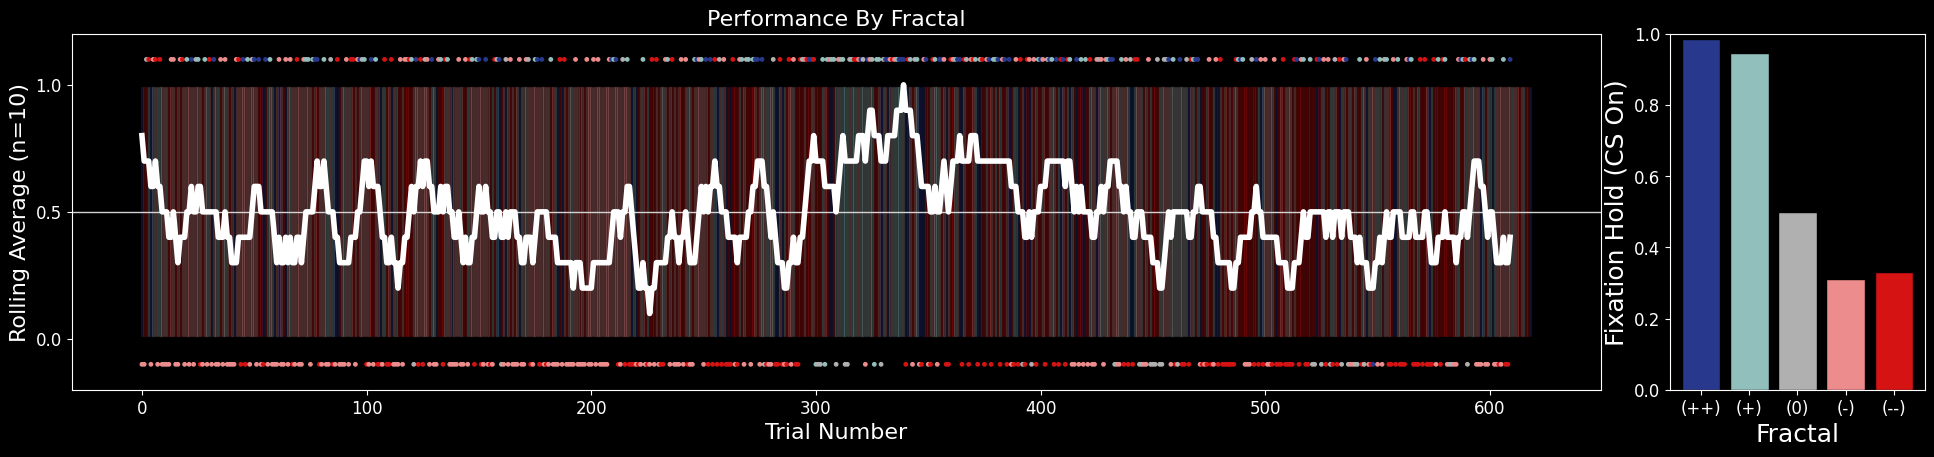

  session_latency.png saved.


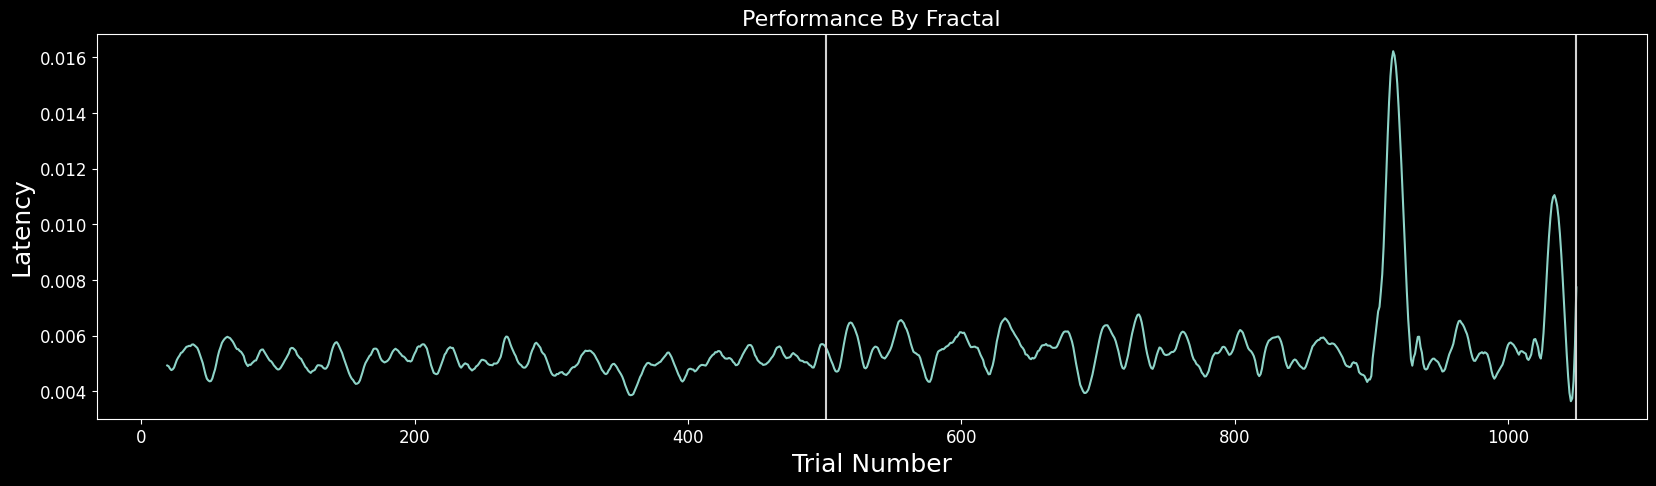

  epoch_hist.png saved.


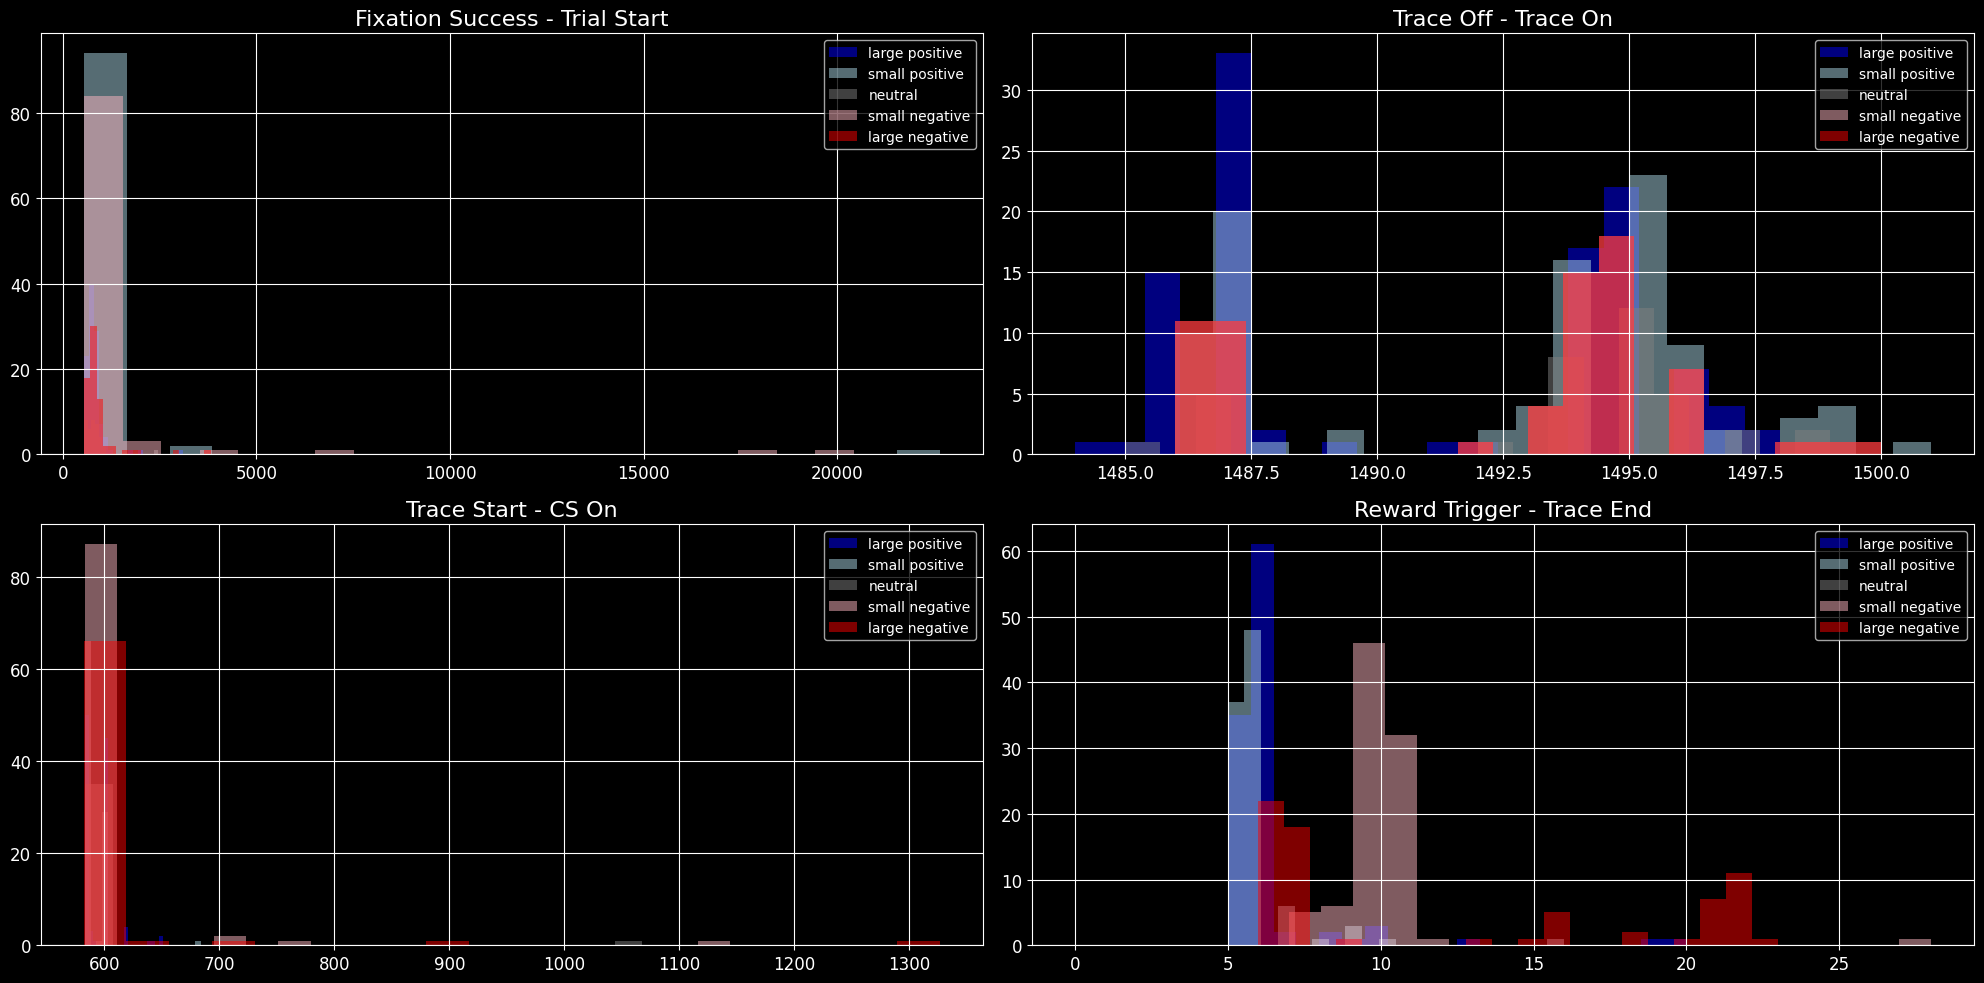

  lick_vs_blink.png saved.
Block: 1
  Valence 1.0: Lick Correlation: -0.28 | Blink Correlation: nan
  Valence 0.5: Lick Correlation: -0.226 | Blink Correlation: 0.169
  Valence 0.0: Lick Correlation: -0.464 | Blink Correlation: 0.125
  Valence -0.5: Lick Correlation: -0.042 | Blink Correlation: 0.208
  Valence -1.0: Lick Correlation: 0.037 | Blink Correlation: -0.22
Block: 2
  Valence 1.0: Lick Correlation: -0.125 | Blink Correlation: 0.115
  Valence 0.5: Lick Correlation: 0.404 | Blink Correlation: 0.132
  Valence 0.0: Lick Correlation: -0.187 | Blink Correlation: -0.153
  Valence -0.5: Lick Correlation: -0.409 | Blink Correlation: 0.001
  Valence -1.0: Lick Correlation: 0.019 | Blink Correlation: -0.182


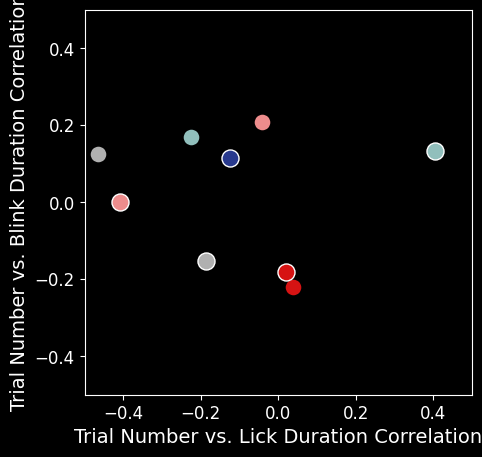

  session_lick_avg.png saved.
  session_blink_avg.png saved.
  fractal_lick_raster.png saved.
  fractal_blink_raster.png saved.
  raster_by_cond_1.svg saved.
  t_test_lick-duration_1.png saved.


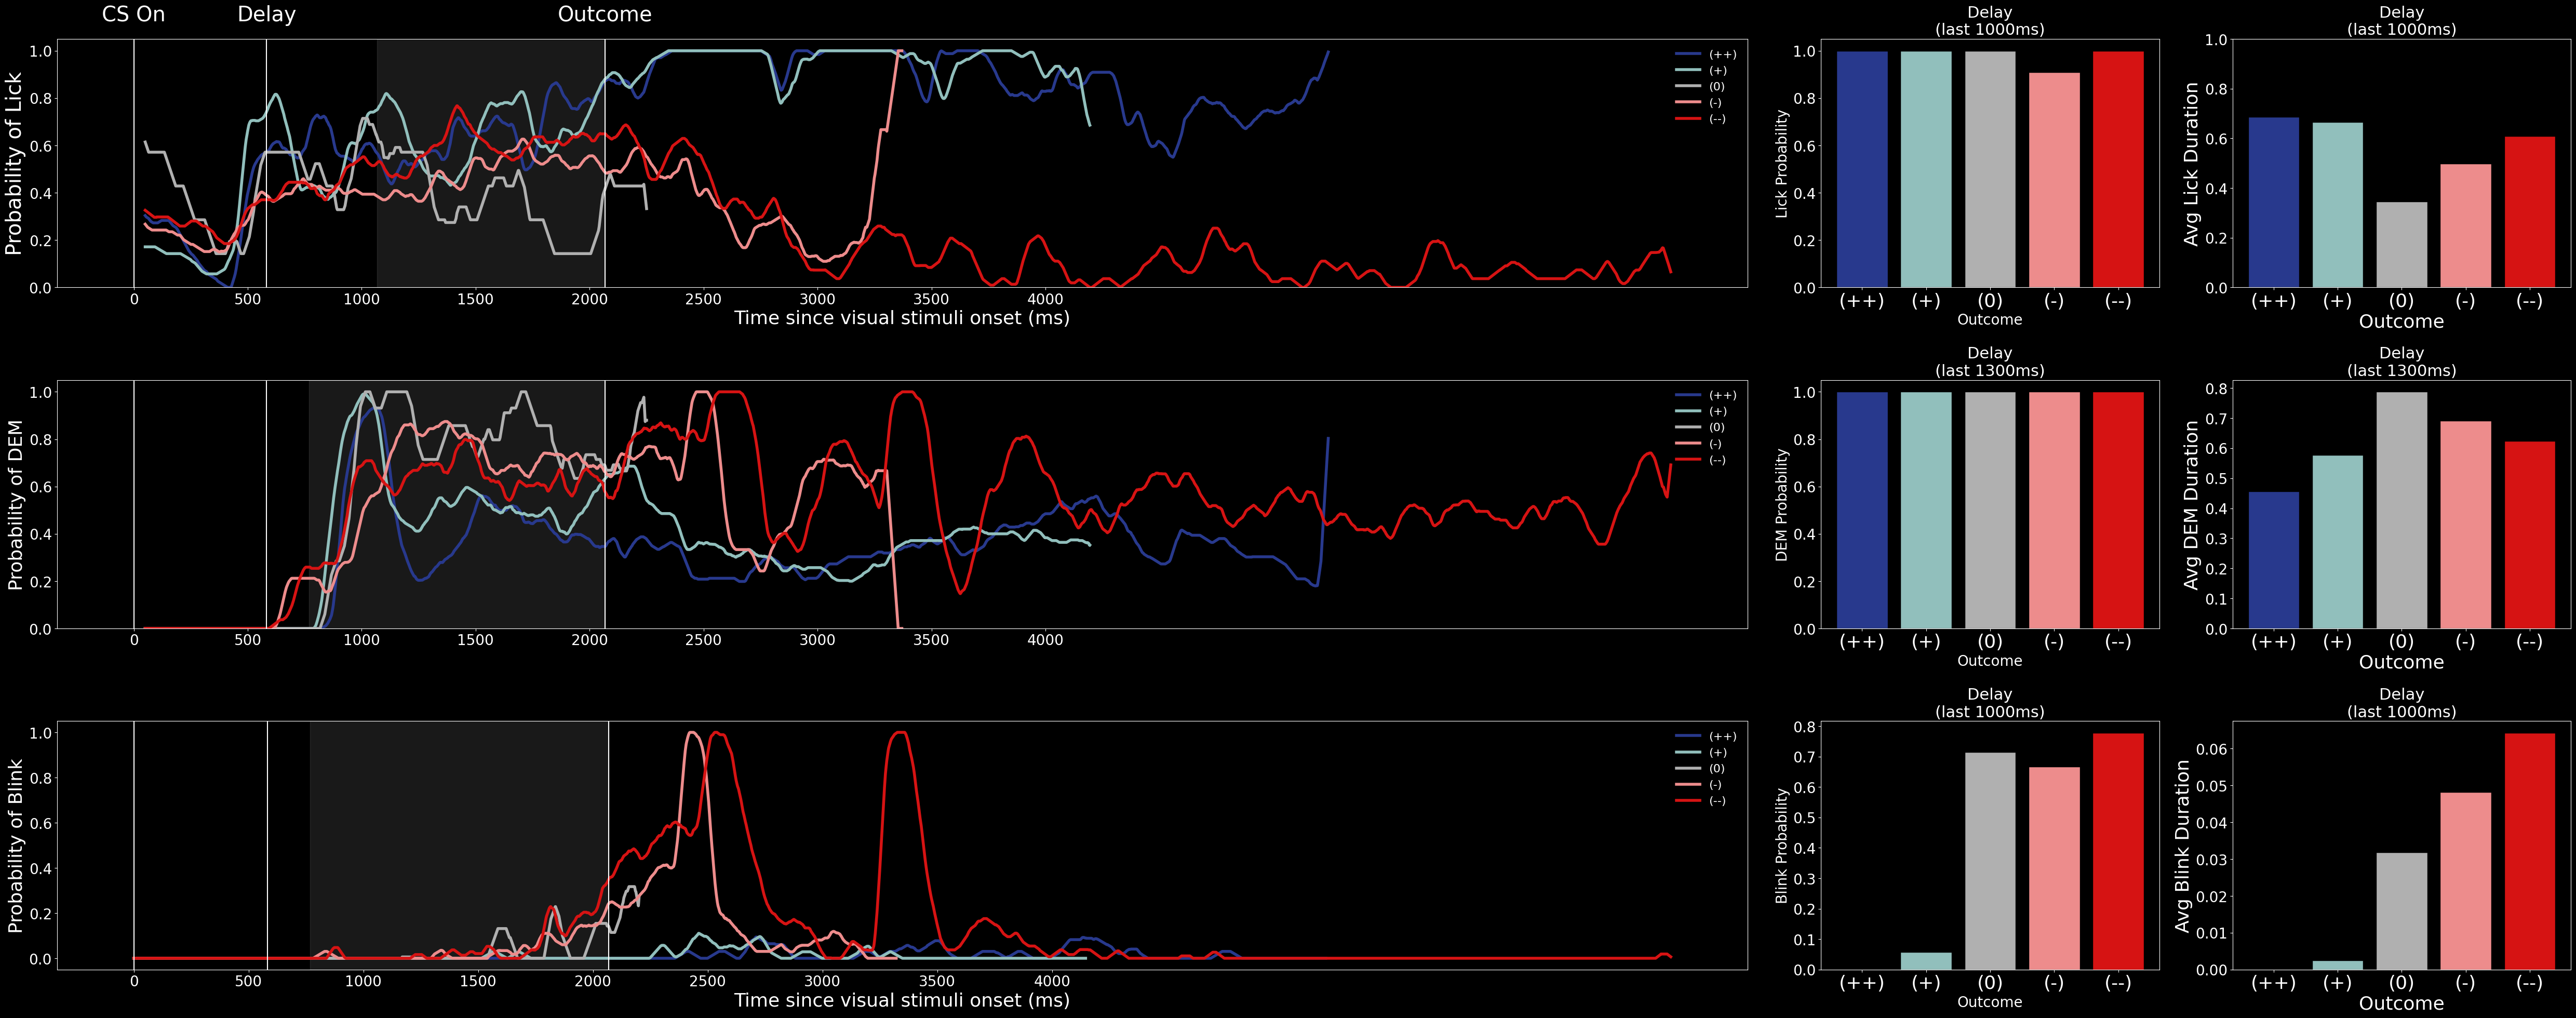

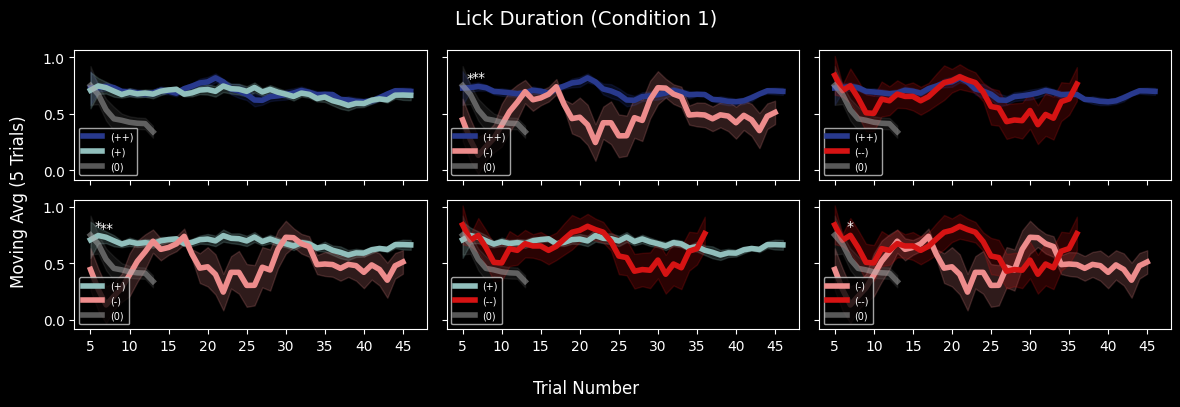

  t_test_DEM-duration_1.png saved.


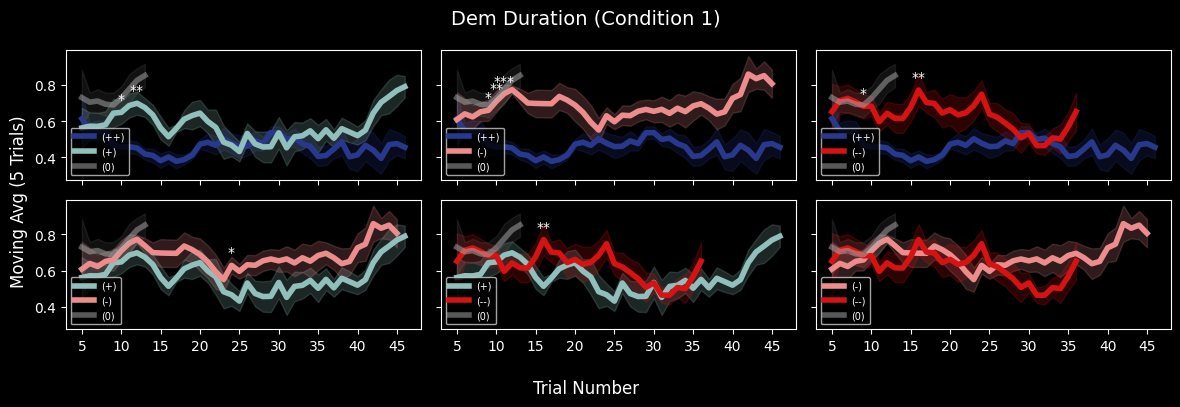

  t_test_blink-duration_1.png saved.


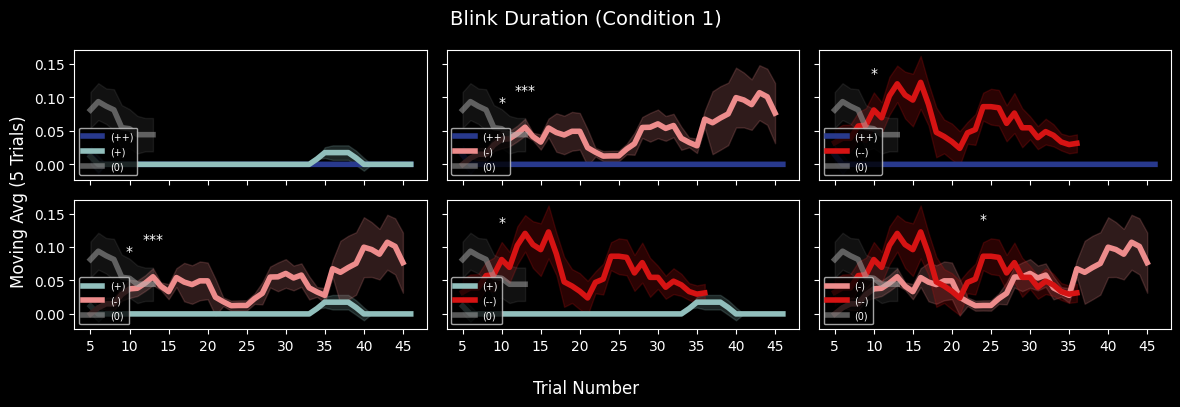

  raster_by_cond_2.svg saved.
  t_test_lick-duration_2.png saved.


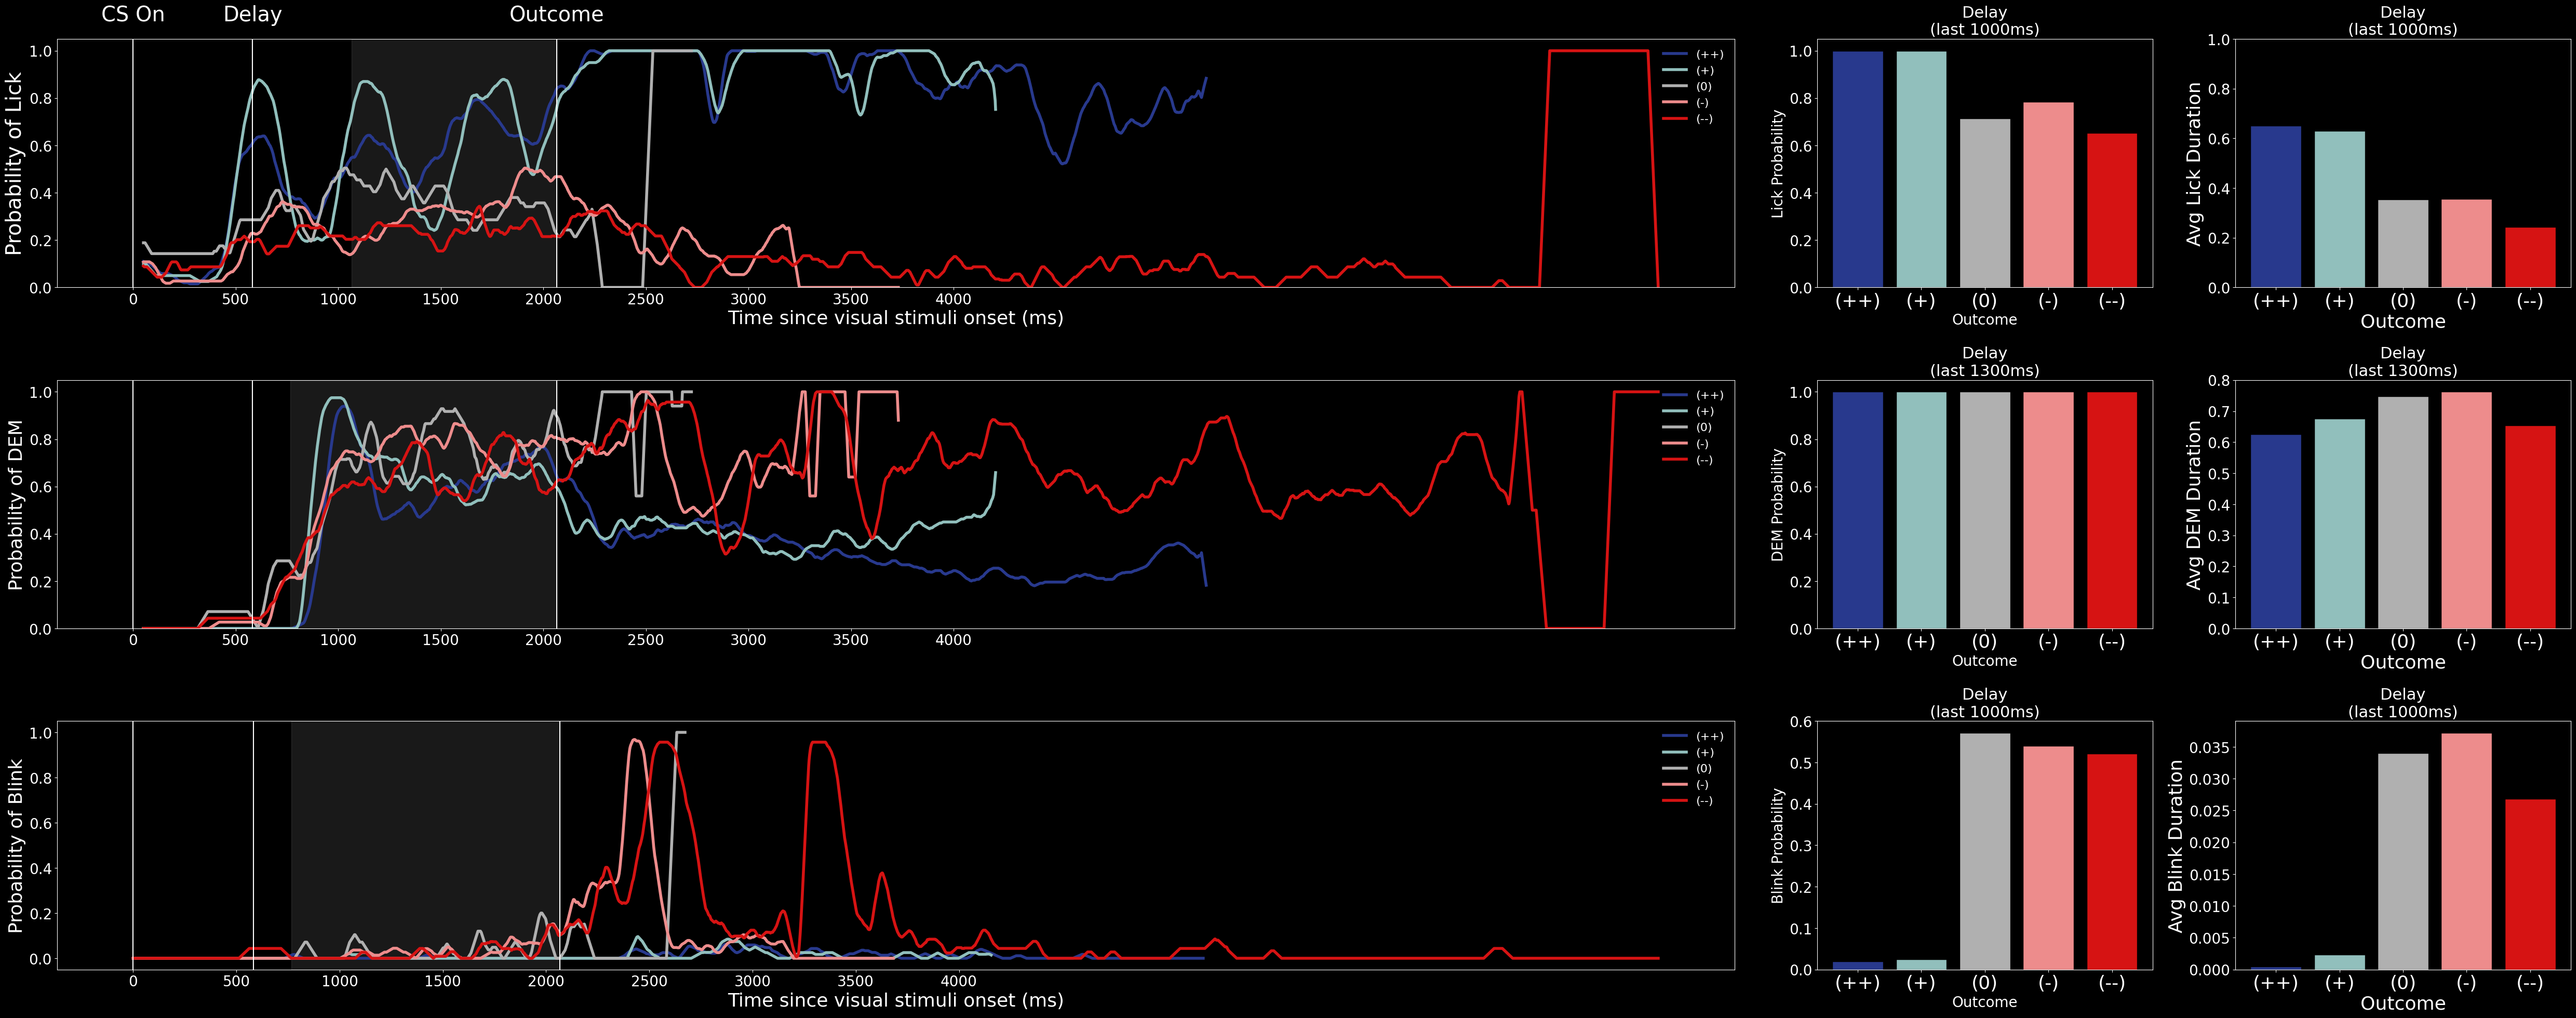

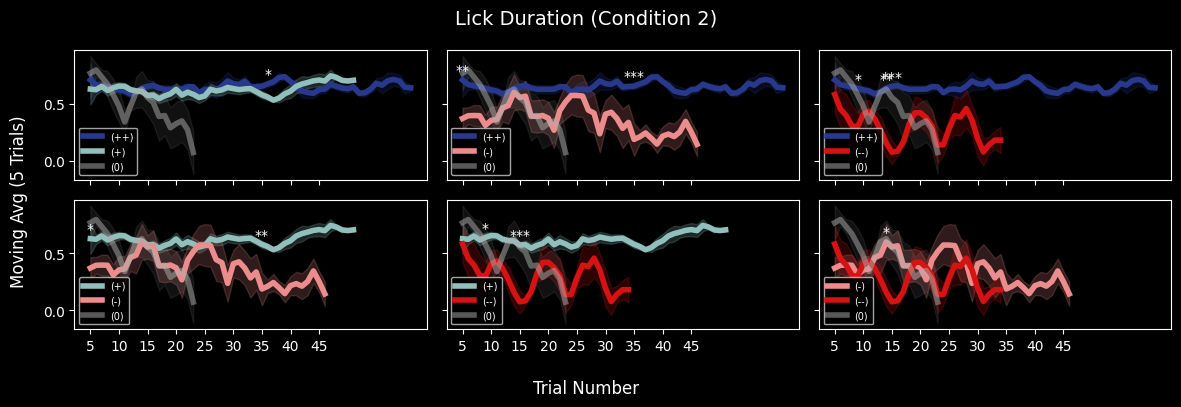

  t_test_DEM-duration_2.png saved.


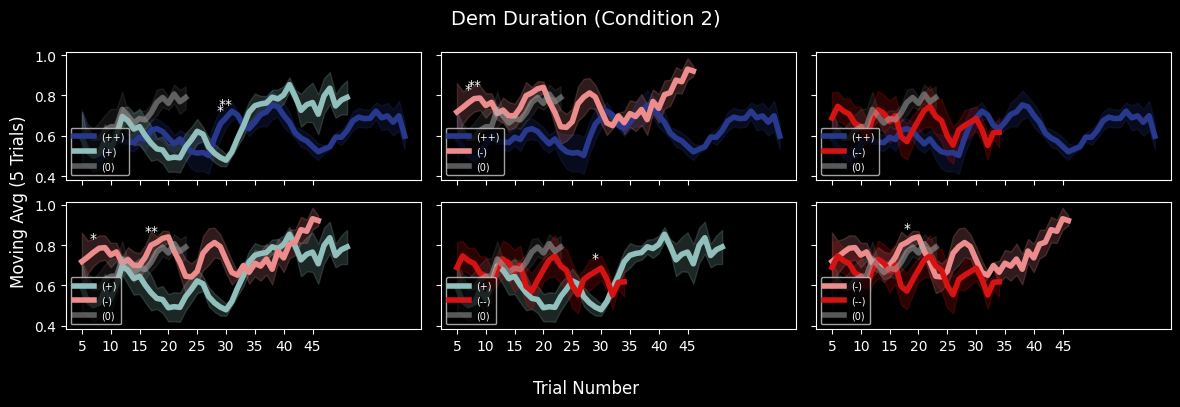

  t_test_blink-duration_2.png saved.


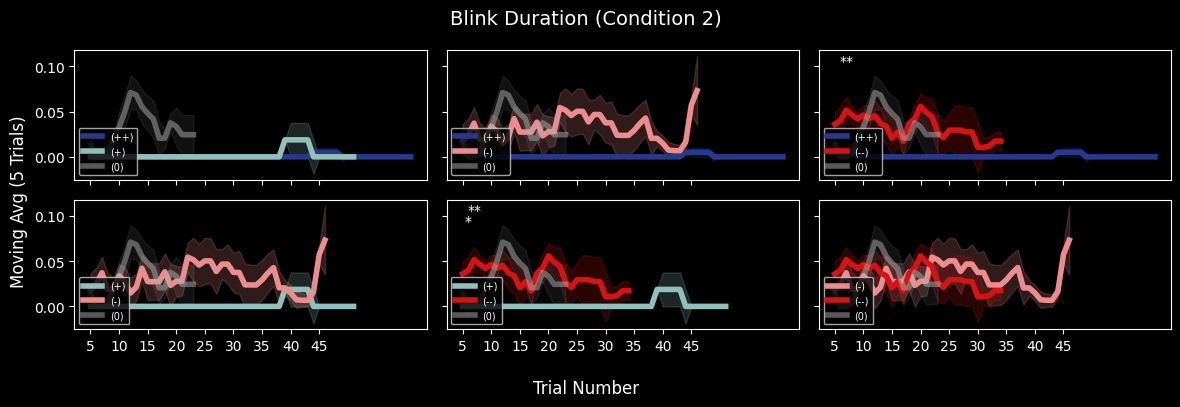

 [0.0, 0.5, 1.0] ANOVA 25.847 | P-value: 1.08E-10
  (0, 1) T-value: -6.229 P-value: 9.14E-09 |  Z-value: -4.938 P-value: 7.88E-07
    0 Lick Mean: 0.411 Lick Std: 0.338 Trials: 89
    1 Lick Mean: 0.649 Lick Std: 0.091 Trials: 52
  (0, 2) T-value: -6.499 P-value: 2.71E-09 |  Z-value: -5.434 P-value: 5.50E-08
    0 Lick Mean: 0.411 Lick Std: 0.338 Trials: 89
    2 Lick Mean: 0.657 Lick Std: 0.089 Trials: 59
  (1, 2) T-value: -0.48 P-value: 6.32E-01 |  Z-value: -0.48 P-value: 6.31E-01
    1 Lick Mean: 0.649 Lick Std: 0.091 Trials: 52
    2 Lick Mean: 0.657 Lick Std: 0.089 Trials: 59
  grant_lick.png saved.
 [0.0, 0.5, 1.0] ANOVA 7.06 | P-value: 1.09E-03
  (0, 1) T-value: -3.602 P-value: 5.24E-04 |  Z-value: -3.546 P-value: 3.92E-04
    0 DEM Mean: 0.622 DEM Std: 0.176 Trials: 118
    1 DEM Mean: 0.729 DEM Std: 0.169 Trials: 47
  (0, 2) T-value: 0.21 P-value: 8.35E-01 |  Z-value: 0.203 P-value: 8.39E-01
    0 DEM Mean: 0.622 DEM Std: 0.176 Trials: 118
    2 DEM Mean: 0.615 DEM Std: 0.164 

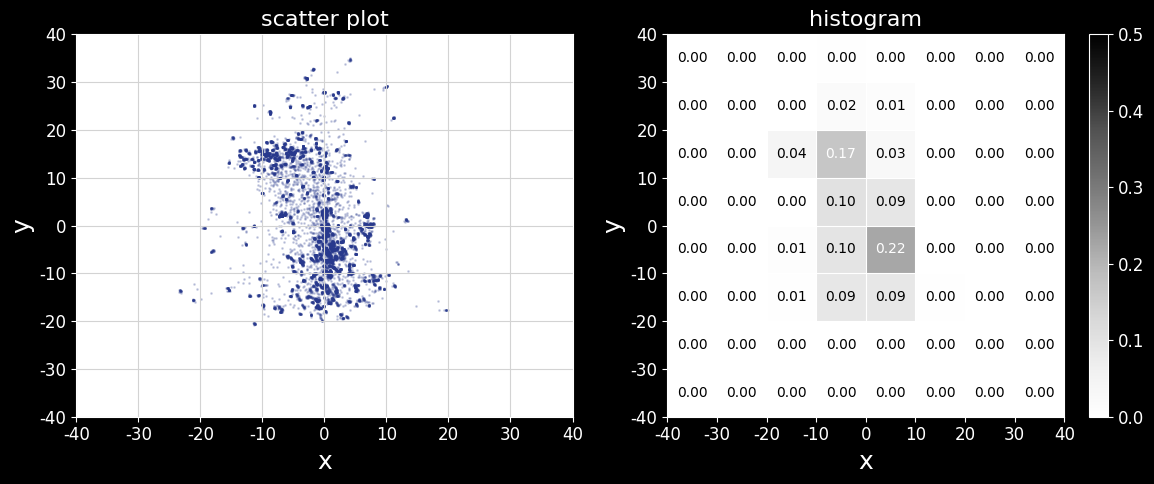

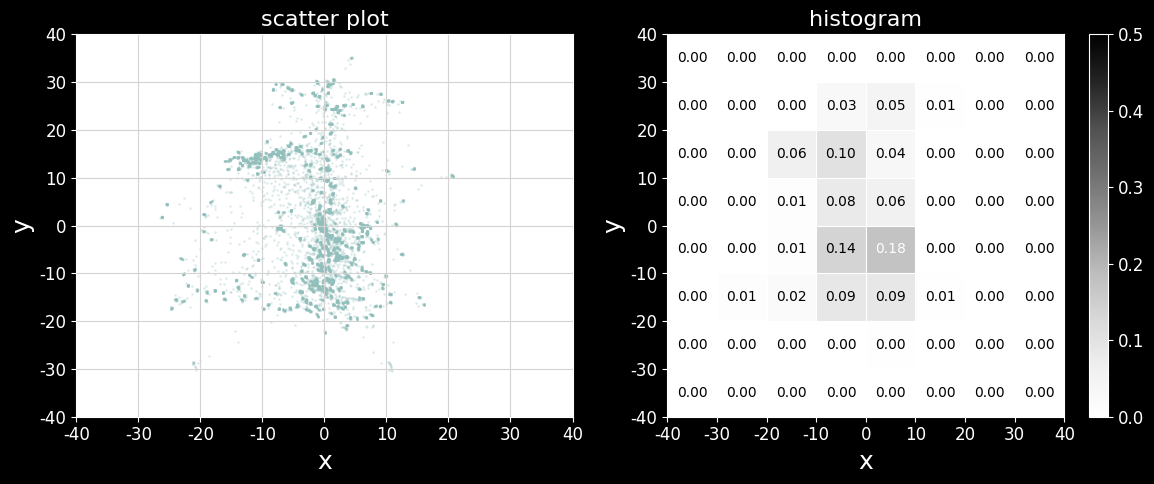

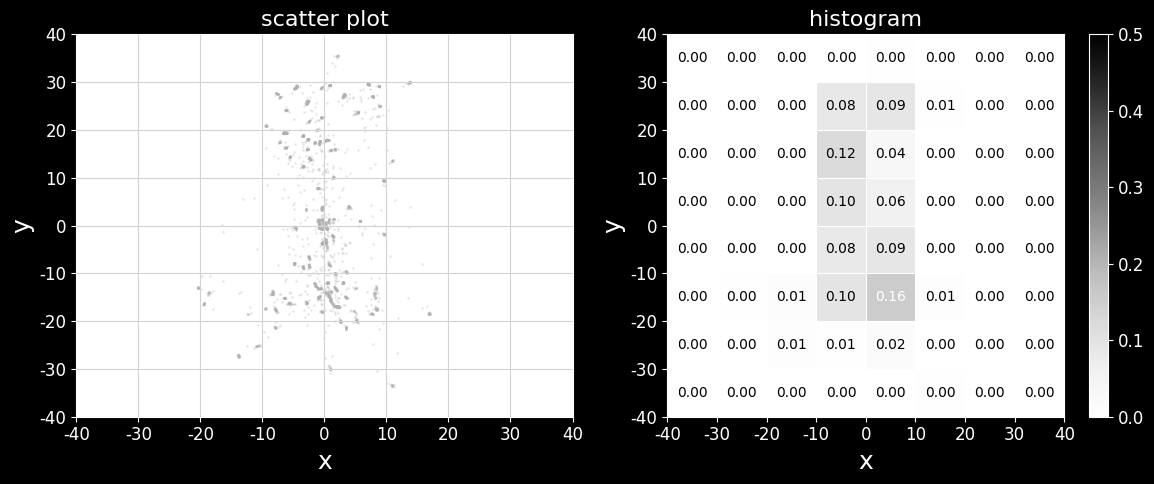

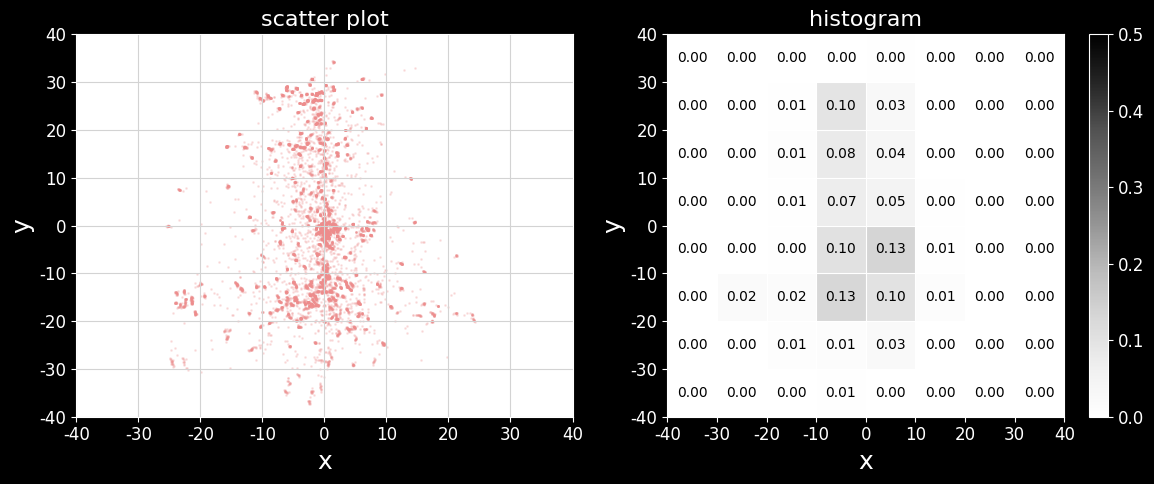

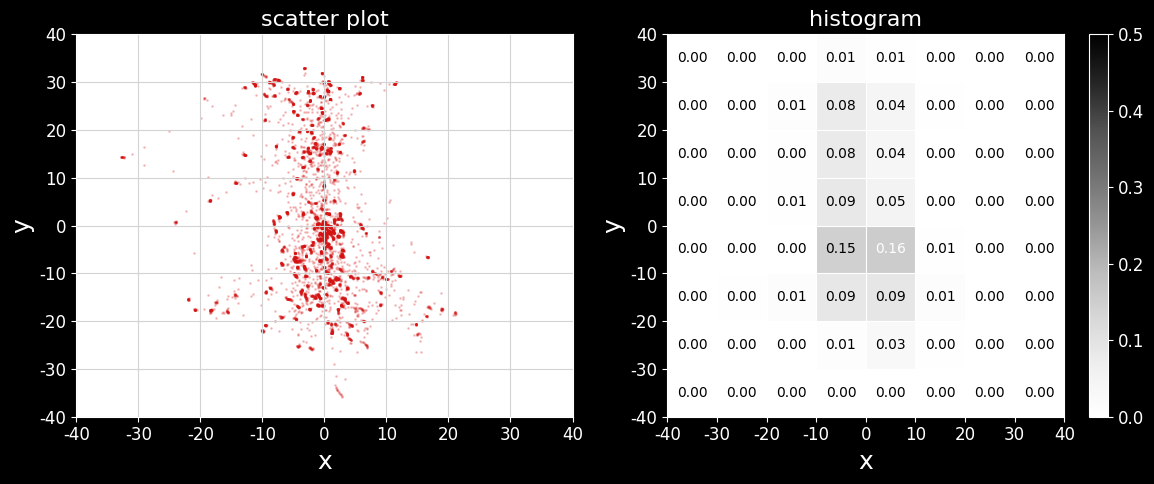

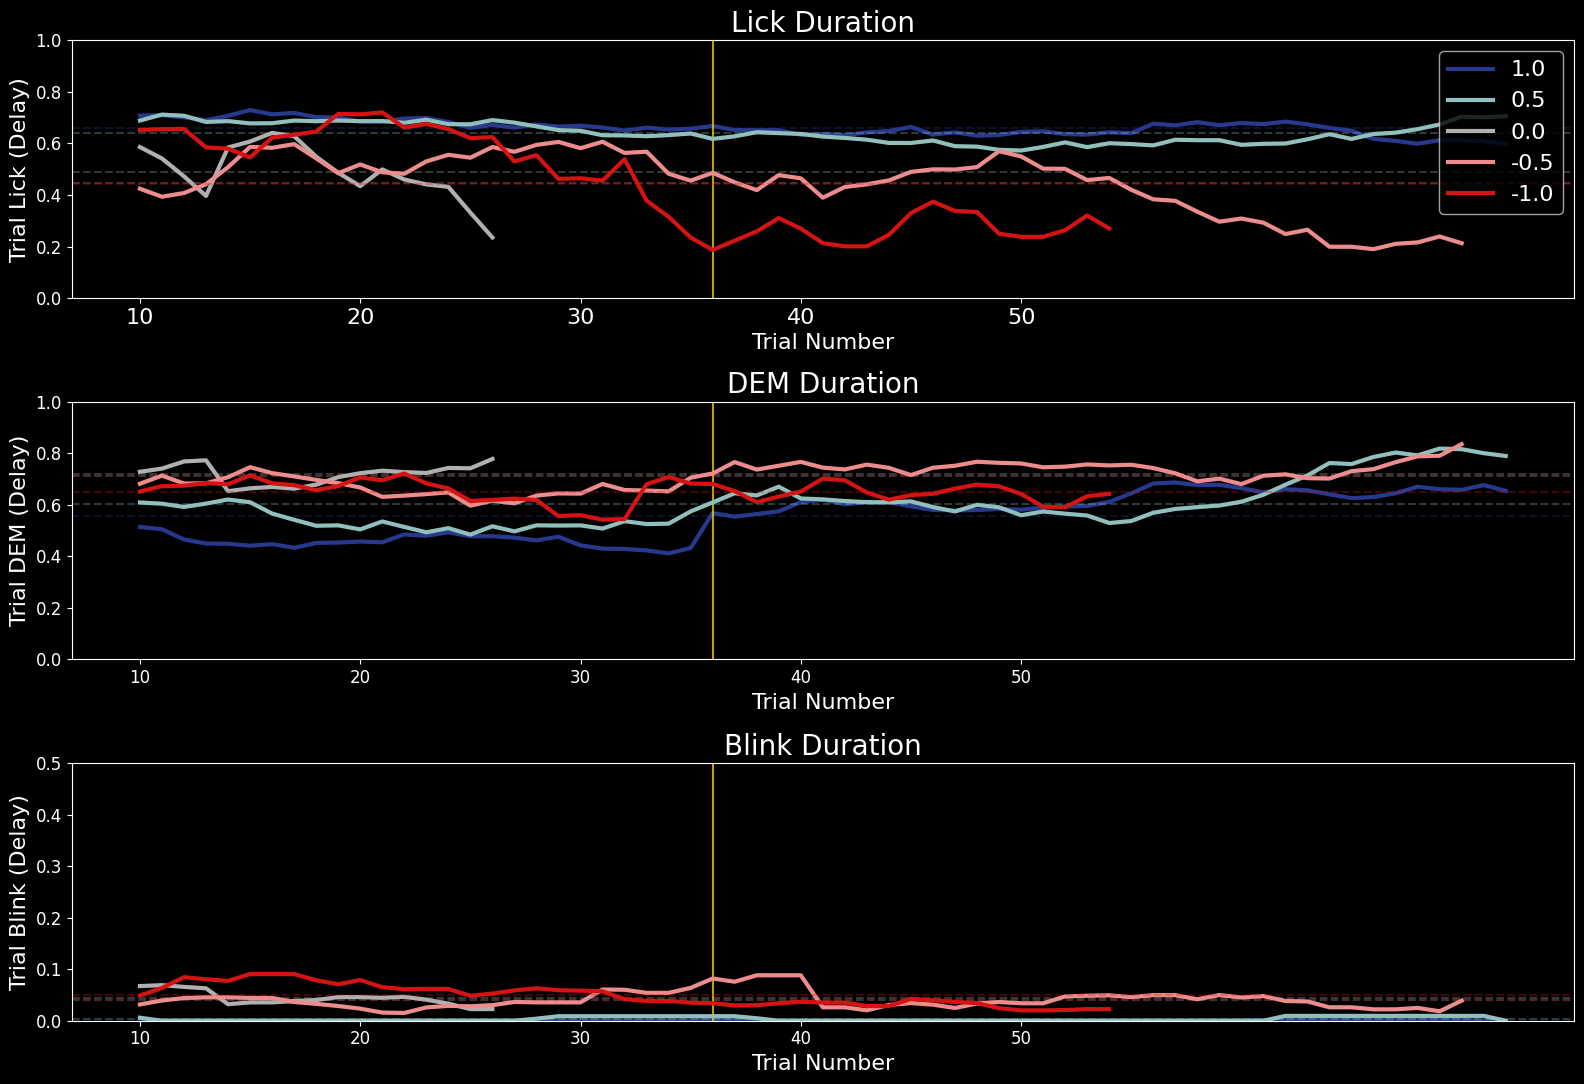

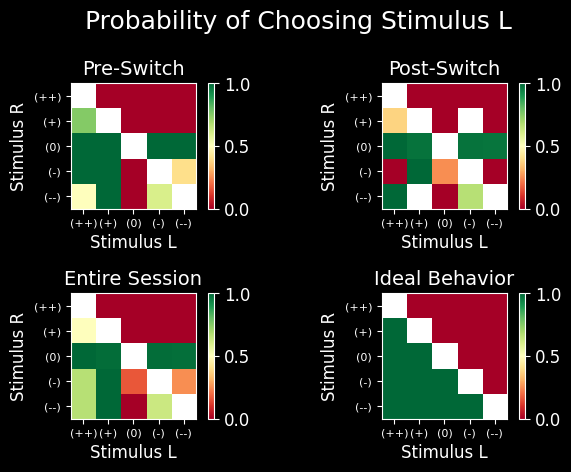

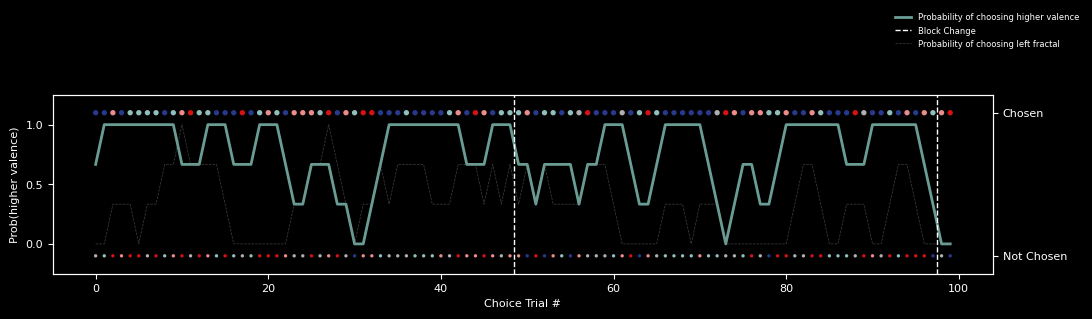

Reward vs. Airpuff Accuracy: 0.80 (+/- 0.19)
  lick_duration: 1.222
  blink_duration_offscreen: -0.429
  pupil_raster_window_avg: -0.158
  blink_duration_window: -0.455
  eye_distance: -0.04


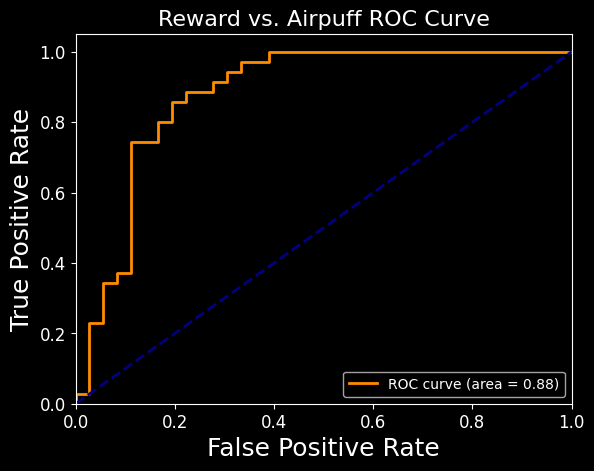

Large Reward vs. Small Reward Accuracy: 0.70 (+/- 0.17)
  lick_duration: -0.27
  blink_duration_offscreen: -0.693
  pupil_raster_window_avg: 0.0
  blink_duration_window: 0.0
  eye_distance: -0.015


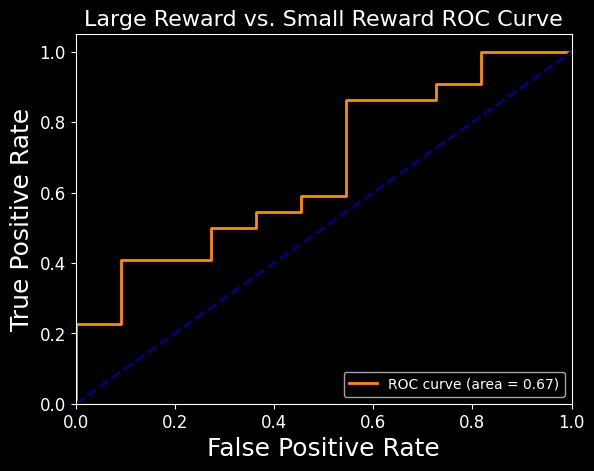

Large Airpuff vs. Small Airpuff Accuracy: 0.45 (+/- 0.13)
  lick_duration: 0.364
  blink_duration_offscreen: -0.418
  pupil_raster_window_avg: 0.109
  blink_duration_window: 0.24
  eye_distance: 0.002


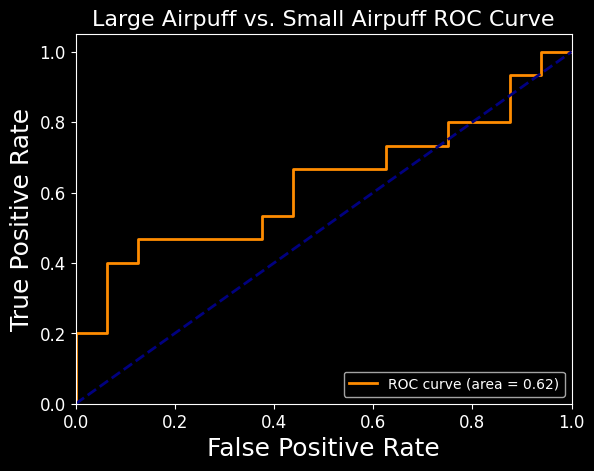


Generating session summary: /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/docs/Tracker/Emotion/markdowns
  Writing 20231012_Bear.md
Writing to excel...
  Writing 231012 to Emotion_Tracker.xlsx


In [43]:
plt.style.use('dark_background')

from analyses.run_functions import run_functions

# dates = [date for date in dates if date not in ['230607', '230609']]
dates = session_df['date'].unique()
for date in dates:
	session_df_date = session_df[session_df['date'] == date]
	session_obj = run_functions(session_df_date, session_obj, path_obj, 
														  behavioral_code_dict, error_dict)

***
## Valence Trial Analyses
### Higher Valence and Reaction Time Performance on Choice Trials

In [25]:
from analyses import print_performance
print_performance.print_performance(session_df)
print('\n')
print_performance.reaction_time_choice(session_df)

Session Performance
 Percent successful reinforcement trials: 0.861 (297/345)
   Valence 1.0: 0.897 (61/68)
   Valence 0.5: 0.967 (59/61)
   Valence 0.0: 0.805 (33/41)
   Valence -0.5: 0.769 (70/91)
   Valence -1.0: 0.881 (74/84)
 Percent successful choice trials: 0.69 (100/145)
   Valence Pair [-0.5, 0.0]: 0.909 (10/11)
   Valence Pair [-0.5, 1.0]: 0.857 (6/7)
   Valence Pair [0.0, 0.5]: 0.833 (5/6)
   Valence Pair [0.5, 1.0]: 0.773 (17/22)
   Valence Pair [-1.0, -0.5]: 0.667 (14/21)
   Valence Pair [-1.0, 0.5]: 0.667 (16/24)
   Valence Pair [-0.5, 0.5]: 0.667 (10/15)
   Valence Pair [0.0, 1.0]: 0.636 (7/11)
   Valence Pair [-1.0, 0.0]: 0.625 (5/8)
   Valence Pair [-1.0, 1.0]: 0.5 (10/20)
 Percent left choice trials: 0.35 (35/100)
 Percent higher valence choice trials: 0.75 (75/100)
   Valence Pair [-1.0, 1.0]: 1.0 (10/10)
   Valence Pair [0.0, 1.0]: 1.0 (7/7)
   Valence Pair [-0.5, 1.0]: 1.0 (6/6)
   Valence Pair [-1.0, 0.5]: 1.0 (16/16)
   Valence Pair [0.5, 1.0]: 1.0 (17/17)
   Val

In [12]:
session_df_reinforcement = session_df_correct[session_df_correct['reinforcement_trial'] == 1]
session_df_reinforcement.groupby(['valence'])\
              [['lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
valence                                                                     
-1.0          0.395219                  0.686723                 0.017935  \
-0.5          0.477621                  0.673706                 0.016620   
 0.0          0.403150                  0.661327                 0.010135   
 0.5          0.542045                  0.618683                 0.002063   
 1.0          0.552016                  0.580958                 0.000328   

         blink_duration_window  eye_distance  
valence                                       
-1.0                  0.070601    182.542639  
-0.5                  0.054149    175.674253  
 0.0                  0.042712    152.798719  
 0.5                  0.005676    132.214357  
 1.0                  0.005675    124.452619

In [13]:
session_df_reinforcement.groupby(['condition', 'fractal_chosen'])\
              [['valence', 'fractal_count_in_block', 'lick_duration',
                'blink_duration_offscreen',
                'pupil_raster_window_avg',
                'blink_duration_window',
                'eye_distance']].mean()

valence  fractal_count_in_block  lick_duration   
condition fractal_chosen                                                   
1         _fractal_A          1.0               18.520000       0.557760  \
          _fractal_B          0.5               21.750000       0.539813   
          _fractal_C         -0.5               18.500000       0.653962   
          _fractal_D         -1.0               24.264706       0.381412   
          _fractal_E          0.0               12.888889       0.390556   
2         _fractal_A         -0.5               27.025000       0.363000   
          _fractal_B         -1.0               28.512821       0.407256   
          _fractal_C          1.0               22.277778       0.548028   
          _fractal_D          0.5               19.382353       0.544147   
          _fractal_E          0.0               14.318182       0.413455   

                          blink_duration_offscreen  pupil_raster_window_avg   
condition fractal_chosen                                                      
1         _fractal_A                      0.552708                 0.000000  \
          _fractal_B                      0.648606                 0.003438   
          _fractal_C                      0.728402                 0.006391   
          _fractal_D                      0.637511                 0.012647   
          _fractal_E                      0.651581                 0.009915   
2         _fractal_A                      0.638154                 0.023269   
          _fractal_B                      0.729625                 0.022544   
          _fractal_C                      0.600577                 0.000556   
          _fractal_D                      0.590520                 0.000769   
          _fractal_E                      0.669301                 0.010315   

                          blink_duration_window  eye_distance  
condition fractal_chosen                                       
1         _fractal_A                   0.000000    119.437749  
          _fractal_B                   0.009375    144.835767  
          _fractal_C                   0.020503    159.748025  
          _fractal_D                   0.038190    163.831953  
          _fractal_E                   0.038632    159.955513  
2         _fractal_A                   0.076019    186.026302  
          _fractal_B                   0.098856    198.854518  
          _fractal_C                   0.009615    127.935167  
          _fractal_D                   0.002195    120.335382  
          _fractal_E                   0.046049    146.943161

### Behavioral Summary Panels by Valence

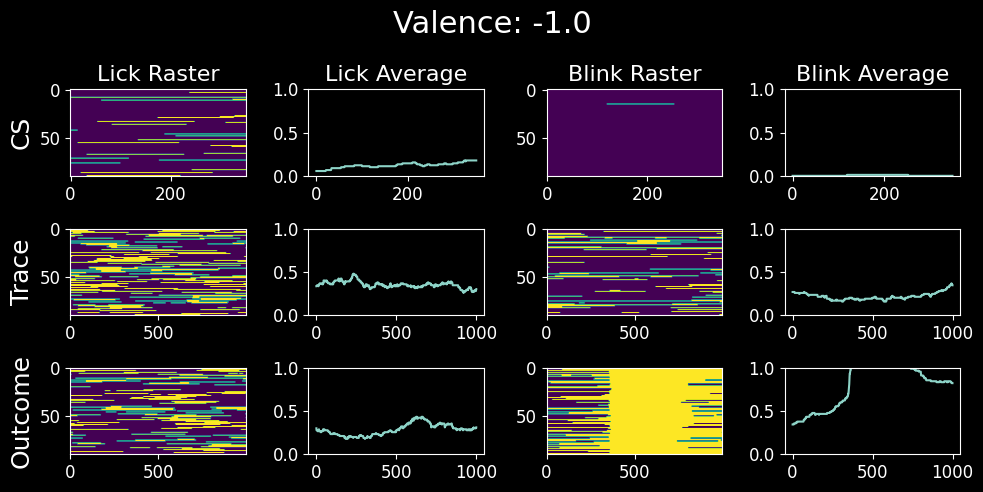

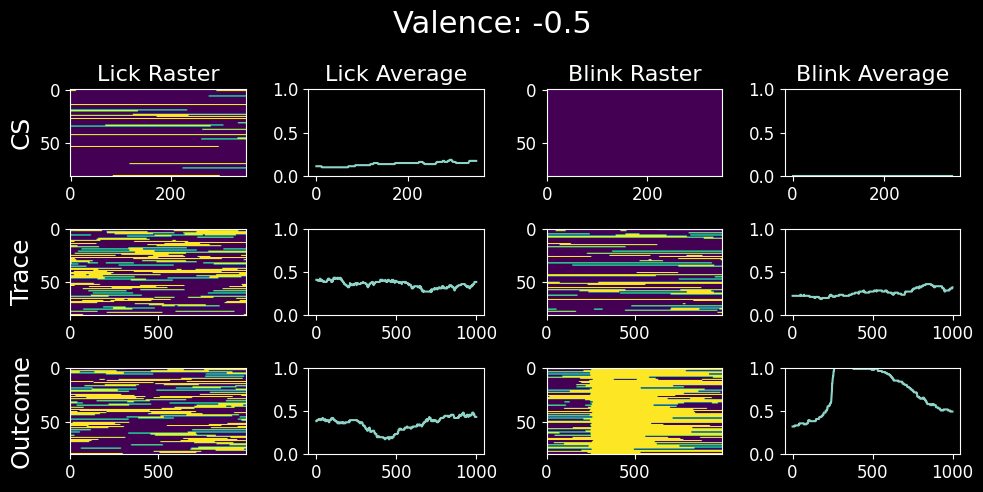

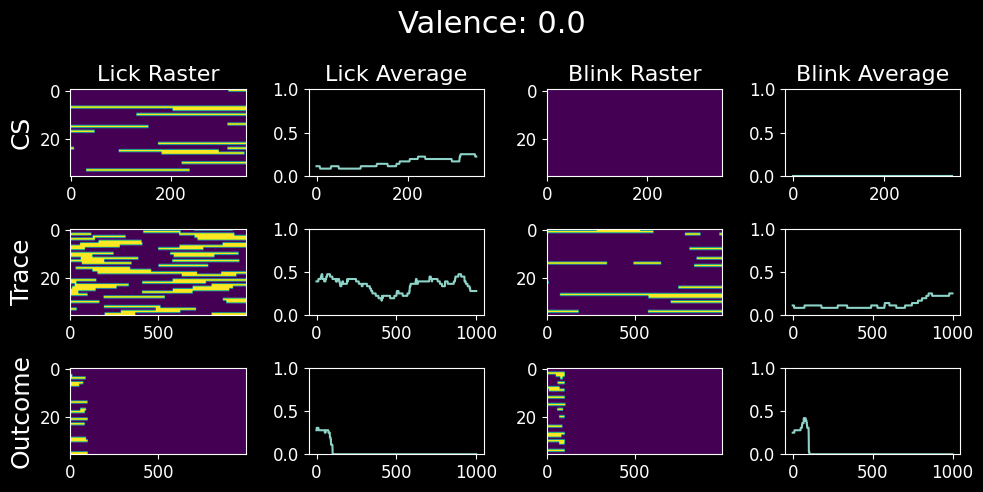

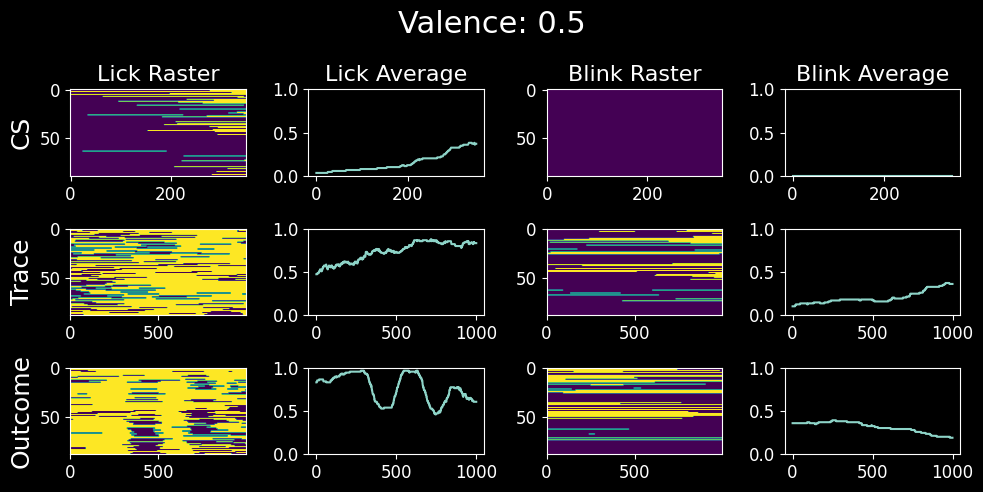

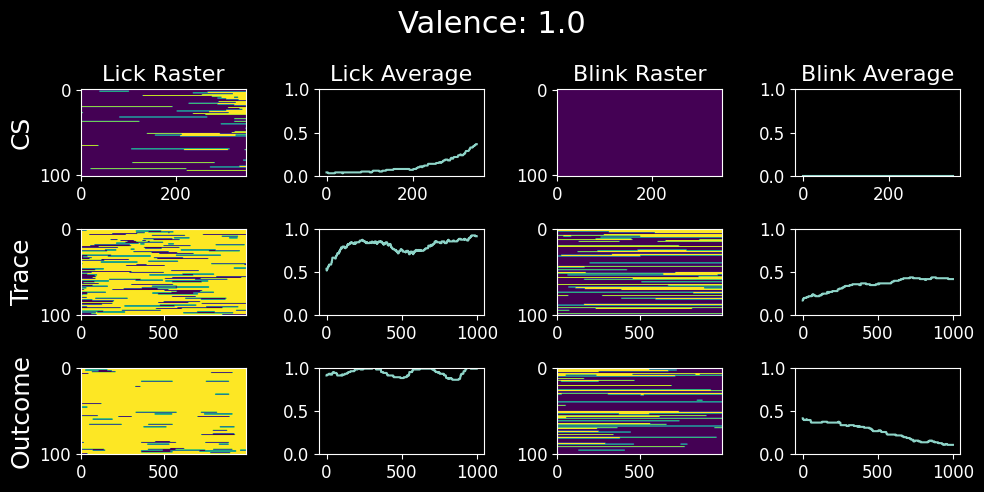

In [26]:
from analyses.beh_summary_panels import valence_panels
valence_panels(session_df_correct)

***
## Exploratory Analysis
### High Lick + Low DEM/Blink Trials

In [28]:
session_df_correct.loc[(session_df_correct['eye_distance'] < 30) &
											 (session_df_correct['lick_duration'] > 0.8)]\
			[['date', 'trial_num', 'valence', 'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  valence  lick_duration  blink_duration_offscreen   
128  231011        129      1.0          0.902                  0.000000  \
290  231011        291      0.5          0.803                  0.393077   
291  231011        292      0.5          0.808                  0.857692   
547  231011        548      0.5          0.867                  0.000000   

     eye_distance  
128     29.138476  
290     25.963935  
291     11.270094  
547     10.011677

### High DEM + Blink + Eye Movement / Low Lick Trials

In [29]:
session_df_correct.loc[(session_df_correct['blink_duration_offscreen'] > 0.25) &
											 (session_df_correct['eye_distance'] > 200) & 
											 (session_df_correct['lick_duration'] < 0.75)]\
		[['date', 'trial_num', 'valence', 'lick_duration', 'blink_duration_offscreen', 'eye_distance']]

date  trial_num  valence  lick_duration  blink_duration_offscreen   
52   231011         53      0.0          0.435                  0.866923  \
191  231011        192      1.0          0.543                  0.928462   
455  231011        456     -0.5          0.252                  0.930000   

     eye_distance  
52     367.509646  
191    264.415085  
455    223.895992

In [30]:
# get correlation between two columns 'pupil_raster_window_avg' and 'blink_duration'
print('Lick vs. DEM Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_offscreen']), 3))
print('Lick vs. Blink Correlation', round(session_df_correct['lick_duration'].corr(session_df_correct['blink_duration_window']), 3))
print('DEM vs. Blink Correlation', round(session_df_correct['blink_duration_offscreen'].corr(session_df_correct['blink_duration_window']), 3))
print('Pupil 0 vs. Blink Correlation', round(session_df_correct['pupil_raster_window_avg'].corr(session_df_correct['blink_duration_window']), 3))

Lick vs. DEM Correlation -0.095
Lick vs. Blink Correlation 0.02
DEM vs. Blink Correlation 0.577
Pupil 0 vs. Blink Correlation 0.977


***
### Video Test

In [31]:
trial_specified = 27
session_df_correct[session_df_correct['trial_num'] == trial_specified]\
  [['reinforcement_trial', 'valence', 'fractal_chosen', 'reward_mag', 'airpuff_mag', 'lick_duration', 'blink_duration_offscreen', 'pupil_raster_window_avg', 'blink_duration_window']]


reinforcement_trial  valence fractal_chosen  reward_mag  airpuff_mag   
26                    0     -0.5     _fractal_C         0.0          0.5  \

    lick_duration  blink_duration_offscreen  pupil_raster_window_avg   
26          0.499                  0.118462                      0.0  \

    blink_duration_window  
26                    0.0

***
## Single Trial Analysis

In [33]:
trial_selected = 15
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
session_df_selected[['correct',
  									 'valence',
										 'lick_duration',
										 'blink_duration_sig',
										 'blink_duration_offscreen',
										 'pupil_raster_window_avg',
                  	 'blink_duration_window',
										 'eye_distance',
										 'Outcome Start',
										 'Reward Trigger',
										 'Airpuff Trigger'
										]]

correct  valence  lick_duration  blink_duration_sig   
14        1      1.0           0.85            0.342308  \

    blink_duration_offscreen  pupil_raster_window_avg  blink_duration_window   
14                  0.586923                 0.342308               0.521538  \

    eye_distance Outcome Start Reward Trigger Airpuff Trigger  
14     92.016822          4543           4550            <NA>

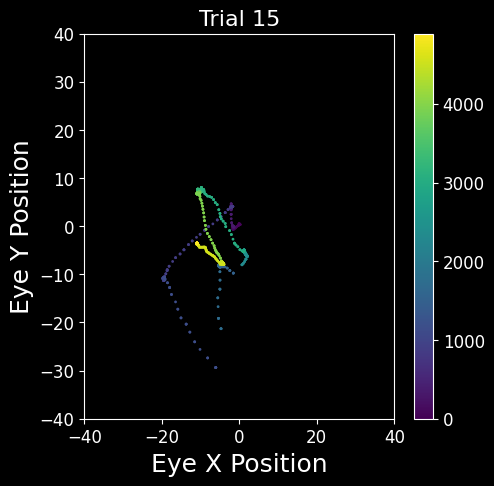

In [34]:
def plot_eye_single_trial(session_df, trial_num):
  # 3 figures, where the left one is twice as tall as the other two
  f, axarr = plt.subplots(1, 1, figsize=(5, 5))
  trial = session_df[session_df['trial_num'] == trial_num]
  trial_fix_off = trial['Fixation Off'].iloc[0]
  trial_eye_x = trial['eye_x'].tolist()[0][trial_fix_off:]
  trial_eye_y = trial['eye_y'].tolist()[0][trial_fix_off:]
  # show heat map
  plt.scatter(trial_eye_x, trial_eye_y, c=np.arange(len(trial_eye_x)), cmap='viridis', s=1)
  plt.colorbar()
  plt.xlim(-40, 40)
  plt.ylim(-40, 40)
  plt.title(f'Trial {trial_num}')
  plt.xlabel('Eye X Position')
  plt.ylabel('Eye Y Position')
  plt.show()

plot_eye_single_trial(session_df, trial_selected)

Total Eye Positions: 1500
Histogram Positions: 1055
-40.0   -30.0   -20.0   -10.0   0.0   10.0   20.0   30.0   
[[0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.0095 0.0104 0.2085 0.49   0.     0.     0.    ]
 [0.     0.0076 0.2512 0.0227 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.    ]]
outside x,y [-10, 10]: 30.14%
outside x,y [-40, 40]: 29.67%
  eye_heatmap_1.0.png saved.


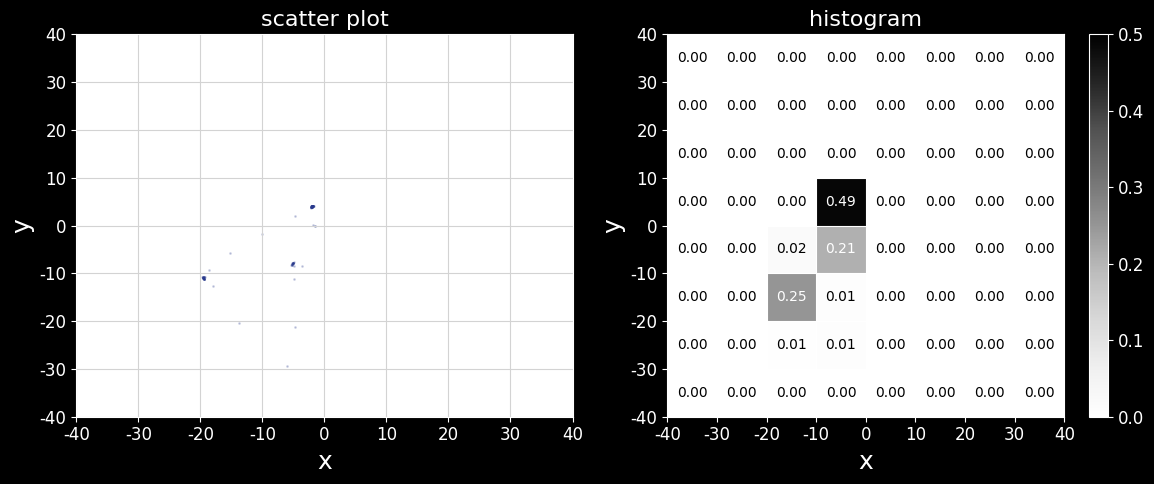

In [35]:
from analyses.eyetracking_analysis import eyetracking_analysis
session_df_selected = session_df[session_df['trial_num'] == trial_selected]
eyetracking_analysis(session_df_selected, session_obj, TRIAL_THRESHOLD=None)

***
## SpikeGLX 

Pickled spikeglx_obj not found for: Bear_230823
Generating new spikeglx_obj...
  Looking for SpikeGLX binary and meta file in:
  /Users/rahimhashim/Google Drive/My Drive/Columbia/Salzman/Monkey-Training/data/raw/data_Probabilistic_Reward_Airpuff_Choice
Video Folders:
[ '230823_Bear_131300',
  '230823_Bear_150114',
  '230823_Bear_132336',
  '230823_Bear_131411']
Number of cameras: 3
  Camera: e3v8360 | Number of videos: 6
  Camera: e3v83ad | Number of videos: 6
  Camera: e3v83d6 | Number of videos: 6
Camera: e3v8360
  Video: e3v8360-20230823T131259-133300.avi | Frames: 144123 | FPS: 120.0 | Length (minutes): 20.02  
  Video: e3v8360-20230823T133300-135300.avi | Frames: 144004 | FPS: 120.0 | Length (minutes): 20.0   
  Video: e3v8360-20230823T135300-141301.avi | Frames: 144124 | FPS: 120.0 | Length (minutes): 20.02  
  Video: e3v8360-20230823T141301-143301.avi | Frames: 144004 | FPS: 120.0 | Length (minutes): 20.0   
  Video: e3v8360-20230823T143301-145302.avi | Frames: 144123 | FPS: 120

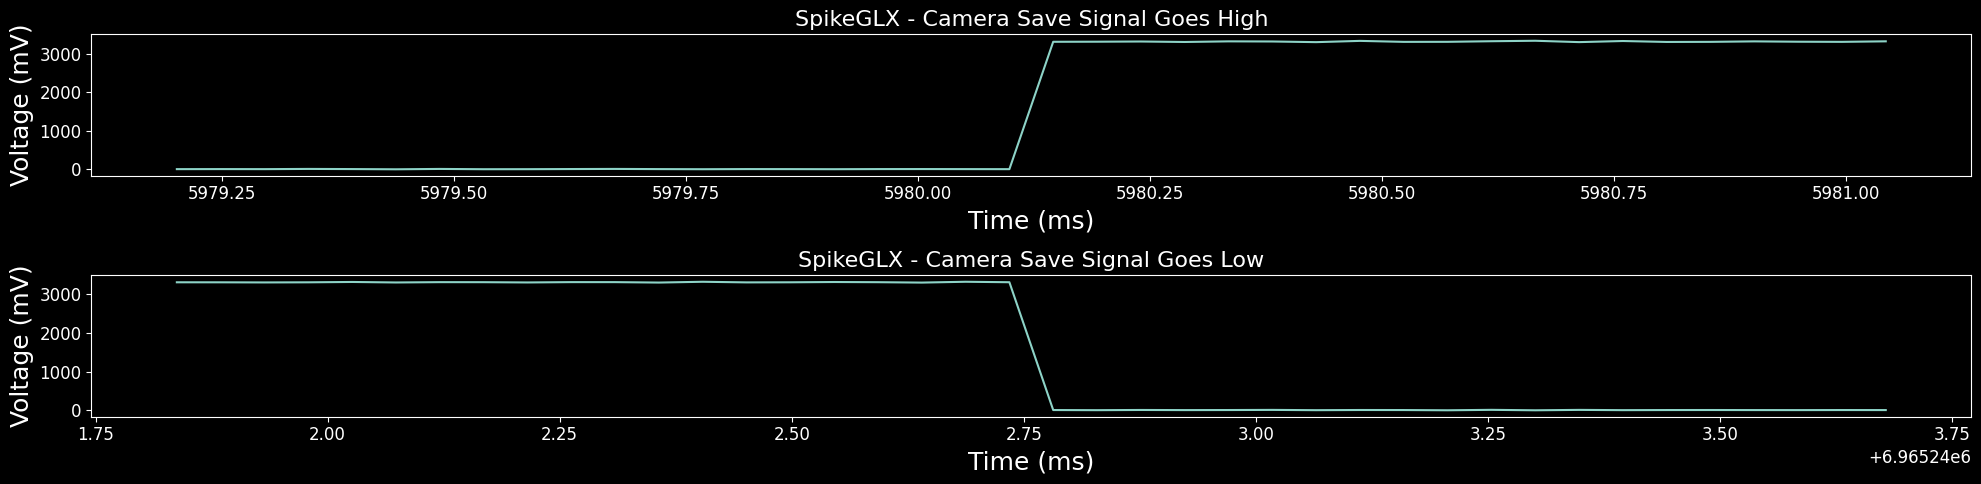

SpikeGLX object created.
Aligning photodiode signals from ML and SpikeGLX...
Trial Number: 0 | start | end | 4852.709599992113 | 15665.709599992113
Trial Number: 0 | Trace Start | Outcome Start | 9047.709599992113 | 10554.709599992113
Trial Number: 1 | start | end | 15665.341599972453 | 23282.341599972453
Trial Number: 1 | Trace Start | Outcome Start | 18722.341599972453 | 20211.341599972453
Trial Number: 2 | start | end | 23282.272799960214 | 32629.272799960214
Trial Number: 2 | Trace Start | Outcome Start | 26067.272799960214 | 27564.272799960214
Trial Number: 3 | start | end | 32630.282399945274 | 38482.282399945274
Trial Number: 3 | Trace Start | Outcome Start | 35425.282399945274 | 36919.282399945274
Trial Number: 4 | start | end | 38481.84639993591 | 42819.84639993591
Trial Number: 4 | Trace Start | Outcome Start | <NA> | <NA>
Trial Number: 5 | start | end | 42819.531199929006 | 47112.531199929006
Trial Number: 5 | Trace Start | Outcome Start | <NA> | <NA>
Trial Number: 6 | start

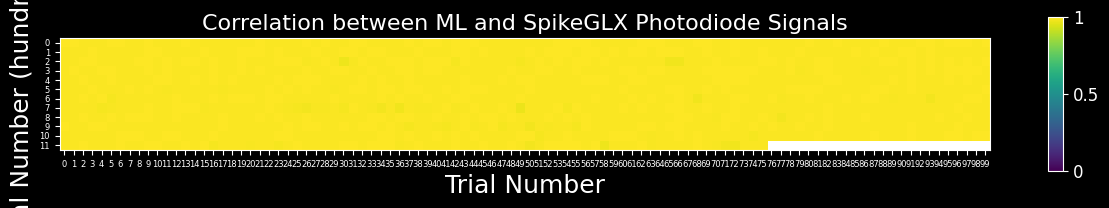

  Done.
Comparing ML and SpikeGLX photodiode signals...
Number of frames in ML Cam TTL: 834974
Number of frames in SpikeGLX Cam TTL: 835104
  Done.
Plotting ML and SpikeGLX photodiode signals...


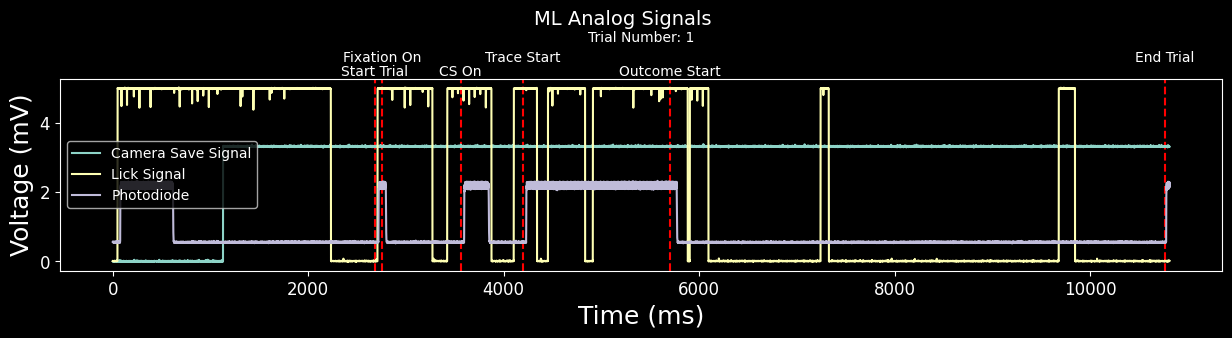

  Done.
Plotting first trial...


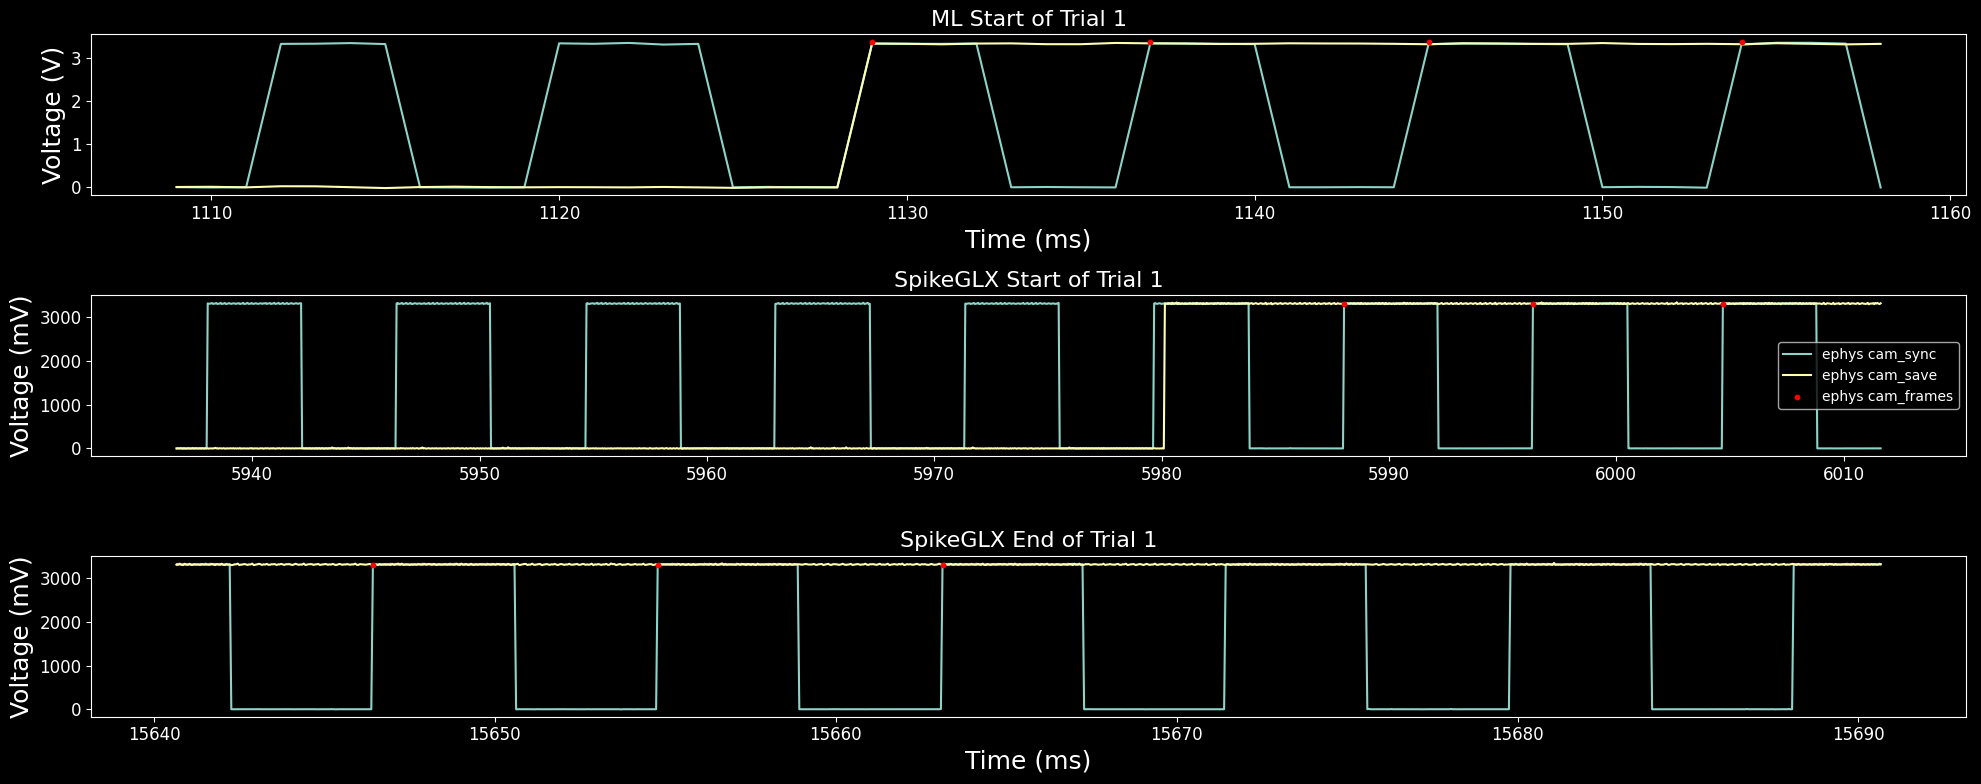

  Done.
Saving spikeglx_obj...
Pickle file size: 5925.726053 MB
Pickle file saved: /Users/rahimhashim/Desktop/Monkey-Emotions/spikeglx_obj_Bear_230823.pkl
  Done. Saved spikeglx_obj to /Users/rahimhashim/Desktop/Monkey-Emotions/spikeglx_obj_Bear_230823.pkl


In [97]:
import re
import math
from pathlib import Path
from spike_glx import read_SGLX
from classes.SpikeGLX import SpikeGLX
from spike_glx.load_SGLX import load_sglx

# Manually assign the signal channel numbers
# from how you set them up on the NI PXIe-6341 board
signal_dict = {
  0: 'cam_sync',
  1: 'cam_save',
  2: 'lick',
  3: 'photodiode',
  4: 'empty'
}

# Manually assign the time epochs you care about
# which have to exist as rows in session_df
epochs = ['Start Trial', 'Fixation On', 'CS On',	
          'Trace Start', 'Outcome Start', 'End Trial']
spikeglx_obj = load_sglx(session_df, session_obj, path_obj, signal_dict, epochs)

### See the raw data to validate
Just to make sure we captured the raw data from SpikeGLX, we're going to plot the first 10 seconds of data generated

In [18]:
# Visualize SpikeGLX channels
read_SGLX.plot_channels_corrected(spikeglx_obj, tStart=0, tEnd=10)

SpikeGLX object missing attributes (meta, chan_dict, signal_dict)


In [100]:
from video.wm_videos import parse_wm_videos

kwargs = {'spikeglx_obj': spikeglx_obj, 
          'session_obj': session_obj, 
          'trial_start': 0,
          'trial_end': len(session_obj.df),
          'epoch_start': 'Trace Start', 
          'epoch_end': 'Outcome Start', 
          'thread_flag': True}

parse_wm_videos(**kwargs)

Parsing Trials for Videos: 0 - 1176
	Deleting existing video file
	Deleting existing video file
	Deleting existing video file
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 0    | Frames: 368-547
  Video complete: Cam: e3v8360 | Trial: 227  | Frames: 9066-9245
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 65   | Frames: 46190-46367
  Video complete: Cam: e3v8360 | Trial: 257  | Frames: 32736-32915
  Video complete: Cam: e3v8360 | Trial: 3    | Frames: 3533-3711
  Video complete: Cam: e3v8360 | Trial: 1    | Frames: 1529-1706
  Video complete: Cam: e3v8360 | Trial: 215  | Frames: 25-203
	Deleting existing video file
	Deleting existing video file
  Video complete: Cam: e3v8360 | Trial: 427  | Frames: 4125-4303
  Video complete: Cam: e3v8360 | Trial: 97   | Frames: 67457-67636
  Video complete: Cam: e3v8360 | Trial: 118  | Frames: 81274-81452
  Video complete: Cam: e3v8360 | Trial: 641  | Frames: 808-987
  Video complete: Cam: e3v8360 | Trial

## Generate MonkeyLogic Behavior Trial Videos


In [19]:
from config.ml_videos import generate_ml_behavior_videos
trial_selected = 27 
generate_ml_behavior_videos(session_df, session_obj, trial_selected)

Generating video for trial 27
Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/eye_0027.mp4


Trial 27 eye:   0%|          | 0/1507 [00:00<?, ?it/s]

Saving video to: /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/lick_0027.mp4


Trial 27 lick:   0%|          | 0/1507 [00:00<?, ?it/s]

***
## DeepLabCut

In [102]:
import os
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=Warning)
import deeplabcut
# Custom modules
from dlc_primate.dlc_utils import dlc_config, dlc_downsample

camera_dict = {
  'e3v8360':'face_1', 
  'e3v83d6':'face_2',
  'e3v83ad':'body_1',
  'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

ModuleNotFoundError: No module named 'deeplabcut'

In [23]:
def initialize_project(dlc_video_path_dict, session_obj, camera_dict):

	config_path_dict = {}
	train_config_path_dict = {}

	# Create ModelZoo project
	for key in dlc_video_path_dict.keys():
		body_part = camera_dict[key]
		project_name = f'{session_obj.date}_{session_obj.monkey}_{body_part}'
		your_name = 'rahim'
		if 'face' in body_part:
			model2use = 'primate_face'
		else:
			model2use = 'full_macaque'
		
		# get list of videos
		video_path_list = dlc_video_path_dict[key]
		# .mp4 or .avi etc.
		videotype = os.path.splitext(video_path_list[0])[-1].lstrip('.')

		# Check if videos need to be downsampled
		downsample_flag = dlc_downsample.check_for_downsample(video_path_list)

		if downsample_flag:
				video_path_list = dlc_downsample.downsample_videos(video_path_list)

		config_path, train_config_path = deeplabcut.create_pretrained_project(
				project_name,
				your_name,
				video_path_list[0:1],
				videotype=videotype,
				model=model2use,
				analyzevideo=True,
				createlabeledvideo=True,
				copy_videos=False, # must leave copy_videos=True
		)
		config_path_dict[key] = config_path
		train_config_path_dict[key] = train_config_path

		# Clean pretrained project
		dlc_config.clean_pretrained_project(config_path)

	return config_path_dict, train_config_path_dict

config_path_dict, train_config_path_dict = initialize_project(dlc_video_path_dict, session_obj, camera_dict)

Checking frame size...
   Pixel width x height: 640x480
No need to downsample videos
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/labeled-data"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/training-datasets"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/dlc-models"
Attempting to create a symbolic link of the video ...
Created the symlink of /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_698_e3v8360.mp4 to /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos/Bear_230928_698_e3v8360.mp4
/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos/Bear_230928_698_e3v8360.mp4
Generated "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/config.yaml"

A new pro

/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/dlc-models/iteration-0/230928_Bear_face_1Oct3-trainset95shuffle1/train/pose_cfg.yaml
Analyzing video...
Using snapshot-1030000 for model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/dlc-models/iteration-0/230928_Bear_face_1Oct3-trainset95shuffle1
Analyzing all the videos in the directory...
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos/Bear_230928_698_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos/Bear_230928_698_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:15<00:00, 11.56it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Analyzing all the videos in the directory...
Filtering with median model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos/Bear_230928_698_e3v8360.mp4
Saving filtered csv poses!
Plotting results...
Analyzing all the videos in the directory...
Starting to process video: /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos/Bear_230928_698_e3v8360.mp4
Loading /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos/Bear_230928_698_e3v8360.mp4 and data.
Duration of vid

100%|██████████| 178/178 [00:00<00:00, 232.46it/s]


Analyzing all the videos in the directory...
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos/Bear_230928_698_e3v8360.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Checking frame size...
   Pixel width x height: 640x480
No need to downsample videos
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/videos"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/labeled-data"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/training-datasets"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/dlc-models"
Attempting to create a symbolic link of the video ...
Created the symlink of /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_684_e3v83ad.mp4 to /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/vi

/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/dlc-models/iteration-0/230928_Bear_body_1Oct3-trainset95shuffle1/train/pose_cfg.yaml
Analyzing video...
Using snapshot-1030000 for model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/dlc-models/iteration-0/230928_Bear_body_1Oct3-trainset95shuffle1
Analyzing all the videos in the directory...
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/videos/Bear_230928_684_e3v83ad.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/videos/Bear_230928_684_e3v83ad.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:14<00:00, 12.20it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Analyzing all the videos in the directory...
Filtering with median model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/videos/Bear_230928_684_e3v83ad.mp4
Saving filtered csv poses!
Plotting results...
Analyzing all the videos in the directory...
Starting to process video: /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/videos/Bear_230928_684_e3v83ad.mp4
Loading /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/videos/Bear_230928_684_e3v83ad.mp4 and data.
Duration of vid

100%|██████████| 178/178 [00:00<00:00, 434.60it/s]


Analyzing all the videos in the directory...
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-03/videos/Bear_230928_684_e3v83ad.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Checking frame size...
   Pixel width x height: 640x480
No need to downsample videos
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/videos"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/labeled-data"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/training-datasets"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/dlc-models"
Attempting to create a symbolic link of the video ...
Created the symlink of /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_131_e3v831b.mp4 to /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/vi

/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/dlc-models/iteration-0/230928_Bear_body_2Oct3-trainset95shuffle1/train/pose_cfg.yaml
Analyzing video...
Using snapshot-1030000 for model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/dlc-models/iteration-0/230928_Bear_body_2Oct3-trainset95shuffle1
Analyzing all the videos in the directory...
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/videos/Bear_230928_131_e3v831b.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/videos/Bear_230928_131_e3v831b.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:13<00:00, 12.78it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Analyzing all the videos in the directory...
Filtering with median model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/videos/Bear_230928_131_e3v831b.mp4
Saving filtered csv poses!
Plotting results...
Analyzing all the videos in the directory...
Starting to process video: /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/videos/Bear_230928_131_e3v831b.mp4
Loading /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/videos/Bear_230928_131_e3v831b.mp4 and data.
Duration of vid

100%|██████████| 178/178 [00:00<00:00, 411.43it/s]


Analyzing all the videos in the directory...
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-03/videos/Bear_230928_131_e3v831b.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Checking frame size...
   Pixel width x height: 640x480
No need to downsample videos
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/videos"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/labeled-data"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/training-datasets"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/dlc-models"
Attempting to create a symbolic link of the video ...
Created the symlink of /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_674_e3v83d6.mp4 to /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/vi

/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/dlc-models/iteration-0/230928_Bear_face_2Oct3-trainset95shuffle1/train/pose_cfg.yaml
Analyzing video...
Using snapshot-1030000 for model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/dlc-models/iteration-0/230928_Bear_face_2Oct3-trainset95shuffle1
Analyzing all the videos in the directory...
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/videos/Bear_230928_674_e3v83d6.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/videos/Bear_230928_674_e3v83d6.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:15<00:00, 11.36it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Analyzing all the videos in the directory...
Filtering with median model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/videos/Bear_230928_674_e3v83d6.mp4
Saving filtered csv poses!
Plotting results...
Analyzing all the videos in the directory...
Starting to process video: /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/videos/Bear_230928_674_e3v83d6.mp4
Loading /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/videos/Bear_230928_674_e3v83d6.mp4 and data.
Duration of vid

100%|██████████| 178/178 [00:00<00:00, 423.43it/s]


Analyzing all the videos in the directory...
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-03/videos/Bear_230928_674_e3v83d6.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory


In [25]:
for key in dlc_video_path_dict.keys():
   video_path_list = dlc_video_path_dict[key]
   video_list_subset = video_path_list[:]
   config_path = config_path_dict[key]
   # Adding new videos to the config.yaml file
   deeplabcut.add_new_videos(config_path, video_list_subset, copy_videos=False, 
               coords=None, extract_frames=False
   )

   # Analyze specified videos
   deeplabcut.analyze_videos(config_path, video_list_subset, 
               videotype, save_as_csv=True
   )

   # Filter predictions
   deeplabcut.filterpredictions(config_path, video_list_subset, videotype=videotype)

   # Create labeled videos
   deeplabcut.create_labeled_video(
      config_path, video_list_subset, 
      videotype, 
      draw_skeleton=True, 
      filtered=True,
      trailpoints=5,
   )

   # Plot trajectories
   deeplabcut.plot_trajectories(config_path, video_list_subset, videotype, filtered=True)

Attempting to create a symbolic link of the video ...
Video /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos/Bear_230928_698_e3v8360.mp4 already exists. Skipping...
Created the symlink of /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_257_e3v8360.mp4 to /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos/Bear_230928_257_e3v8360.mp4
Created the symlink of /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_181_e3v8360.mp4 to /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos/Bear_230928_181_e3v8360.mp4
Created the symlink of /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_615_e3v8360.mp4 to /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-03/videos/Bear_230928_615_e3v8360.mp4
Created the symlink of /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_284_e3v8360.mp4

100%|██████████| 178/178 [00:16<00:00, 11.06it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_257_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_257_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:18<00:00,  9.74it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_181_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_181_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:18<00:00,  9.55it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_615_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_615_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:18<00:00,  9.37it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_284_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_284_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:19<00:00,  9.30it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_3_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_3_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:18<00:00,  9.89it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_152_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_152_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:18<00:00,  9.59it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_729_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_729_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:18<00:00,  9.60it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_510_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_510_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:17<00:00, 10.04it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_50_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_50_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:17<00:00, 10.27it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_745_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_745_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:16<00:00, 10.74it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_627_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_627_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:17<00:00, 10.23it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_265_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_265_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:17<00:00,  9.98it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_581_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_581_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:16<00:00, 10.76it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_298_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_298_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:17<00:00, 10.18it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_657_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_657_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:17<00:00, 10.24it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_359_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_359_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:17<00:00, 10.25it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_110_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_110_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:18<00:00,  9.55it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_522_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_522_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.87it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_62_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_62_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:18<00:00,  9.93it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_816_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_816_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:19<00:00,  9.12it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_430_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_430_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:18<00:00,  9.84it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_160_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_160_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:17<00:00,  9.97it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_552_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_552_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:17<00:00,  9.97it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_684_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_684_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.88it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_12_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_12_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.68it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_783_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_783_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.80it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_455_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_455_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.64it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_537_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_537_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.76it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_175_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_175_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:19<00:00,  9.02it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_425_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_425_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:20<00:00,  8.87it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_547_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_547_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:19<00:00,  8.95it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_750_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_750_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.63it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_200_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_200_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.54it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_362_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_362_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:20<00:00,  8.65it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_720_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_720_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:21<00:00,  8.46it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_270_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_270_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:21<00:00,  8.41it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_569_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_569_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:21<00:00,  8.41it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_642_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_642_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.51it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_147_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_147_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:40<00:00,  4.46it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_588_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_588_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:29<00:00,  6.04it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_575_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_575_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:24<00:00,  7.33it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_35_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_35_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:22<00:00,  7.90it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_137_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_137_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:27<00:00,  6.51it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_45_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_45_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:28<00:00,  6.32it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_194_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_194_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:27<00:00,  6.32it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_169_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_169_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:28<00:00,  6.26it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_670_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_670_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:30<00:00,  5.84it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_232_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_232_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:27<00:00,  6.50it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_119_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_119_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:28<00:00,  6.26it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_449_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_449_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:28<00:00,  6.16it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_600_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_600_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:27<00:00,  6.52it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_591_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_591_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:28<00:00,  6.35it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_317_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_317_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:28<00:00,  6.39it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_647_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_647_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:28<00:00,  6.24it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_288_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_288_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:28<00:00,  6.23it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_275_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_275_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:29<00:00,  6.06it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_755_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_755_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:29<00:00,  6.02it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_205_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_205_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:29<00:00,  5.94it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_483_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_483_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:30<00:00,  5.88it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_542_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_542_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:31<00:00,  5.74it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_420_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_420_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:29<00:00,  5.95it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_619_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_619_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:29<00:00,  6.03it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_100_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_100_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:30<00:00,  5.72it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_605_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_605_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:30<00:00,  5.76it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_93_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_93_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:30<00:00,  5.82it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_237_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_237_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:30<00:00,  5.79it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_675_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_675_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:31<00:00,  5.77it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_717_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_717_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:32<00:00,  5.50it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_386_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_386_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:32<00:00,  5.47it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_30_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_30_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:31<00:00,  5.62it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_269_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_269_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:30<00:00,  5.83it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_412_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_412_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:30<00:00,  5.80it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_142_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_142_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:21<00:00,  2.19it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_515_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_515_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:30<00:00,  5.92it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_55_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_55_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:20<00:00,  2.20it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_281_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_281_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:14<00:00,  2.40it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_6_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_6_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:29<00:00,  6.13it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_598_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_598_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:51<00:00,  3.48it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_407_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_407_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [13:40<00:00,  4.58s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_459_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_459_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [09:46<00:00,  3.30s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_340_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_340_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:35<00:00,  5.06it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_610_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_610_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:46<00:00,  3.85it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_222_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_222_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:58<00:00,  3.04it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_429_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_429_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [02:22<00:00,  1.26it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_660_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_660_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:19<00:00,  2.26it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_681_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_681_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [05:10<00:00,  1.73s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_17_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_17_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:36<00:00,  4.90it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_435_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_435_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [03:22<00:00,  1.14s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_165_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_165_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:42<00:00,  4.18it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_527_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_527_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [19:38<00:00,  6.62s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_793_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_793_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [23:43<00:00,  7.95s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_445_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_445_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [03:09<00:00,  1.06s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_652_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_652_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [06:30<00:00,  2.19s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_260_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_260_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [05:57<00:00,  2.01s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_579_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_579_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [12:46<00:00,  4.31s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_622_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_622_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [03:43<00:00,  1.25s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_372_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_372_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:43<00:00,  1.72it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_740_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_740_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [03:08<00:00,  1.05s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_496_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_496_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:42<00:00,  4.17it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_509_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_509_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [04:06<00:00,  1.37s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_733_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_733_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [04:23<00:00,  1.48s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_301_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_301_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:46<00:00,  3.84it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_418_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_418_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [03:46<00:00,  1.27s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_743_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_743_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [07:54<00:00,  2.65s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_138_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_138_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:56<00:00,  1.52it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_436_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_436_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [07:09<00:00,  2.41s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_166_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_166_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:35<00:00,  1.87it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_810_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_810_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [23:48<00:00,  7.98s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_14_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_14_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [04:58<00:00,  1.69s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_446_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_446_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:41<00:00,  1.75it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_790_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_790_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [54:19<00:00, 18.21s/it]  


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_64_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_64_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:16<00:00,  2.33it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_524_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_524_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [05:44<00:00,  1.93s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_538_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_538_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:52<00:00,  3.42it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_78_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_78_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [08:21<00:00,  2.80s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_771_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_771_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [03:57<00:00,  1.34s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_85_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_85_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:49<00:00,  1.63it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_343_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_343_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [04:42<00:00,  1.58s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_548_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_548_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [10:08<00:00,  3.42s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_701_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_701_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:04<00:00,  2.78it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_251_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_251_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [23:25<00:00,  7.89s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_663_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_663_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [05:50<00:00,  1.97s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_474_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_474_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [56:37<00:00, 19.09s/it]  


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_390_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_390_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [24:02<00:00,  8.10s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_56_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_56_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [1:43:01<00:00, 34.53s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_489_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_489_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [09:21<00:00,  3.16s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_154_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_154_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [12:34<00:00,  4.21s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_404_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_404_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [11:35<00:00,  3.91s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_282_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_282_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [05:56<00:00,  2.00s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_5_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_5_e3v8360.mp4
Duration of video [s]:  1.5 , recorded with  120.0 fps!
Overall # of frames:  180  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 180/180 [06:09<00:00,  2.05s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_26_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_26_e3v8360.mp4
Duration of video [s]:  1.5 , recorded with  120.0 fps!
Overall # of frames:  180  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 180/180 [07:25<00:00,  2.47s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_566_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_566_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [30:35<00:00, 10.31s/it]  


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_131_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_131_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [07:28<00:00,  2.52s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_43_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_43_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [56:35<00:00, 19.07s/it]  


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_385_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_385_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [13:14<00:00,  4.46s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_503_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_503_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [1:00:17<00:00, 20.32s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_411_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_411_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [17:02<00:00,  5.74s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_308_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_308_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [11:34<00:00,  3.88s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_297_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_297_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:56<00:00,  3.17it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_356_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_356_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [20:34<00:00,  6.93s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_90_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_90_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [02:09<00:00,  1.38it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_714_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_714_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [02:46<00:00,  1.07it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_676_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_676_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:08<00:00,  2.59it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_819_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_819_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:08<00:00,  2.60it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_423_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_423_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [04:23<00:00,  1.47s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_805_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_805_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [20:31<00:00,  6.96s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_541_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_541_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:55<00:00,  1.54it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_103_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_103_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [59:55<00:00, 20.31s/it]  


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_453_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_453_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [15:33<00:00,  5.21s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_71_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_71_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [16:37<00:00,  5.57s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_531_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_531_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:10<00:00,  2.53it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_480_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_480_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:13<00:00,  2.42it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_756_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_756_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:10<00:00,  2.52it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_399_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_399_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:14<00:00,  2.39it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_364_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_364_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:28<00:00,  2.03it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_323_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_323_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [13:00<00:00,  4.36s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_197_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_197_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:50<00:00,  3.53it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_241_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_241_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:00<00:00,  2.98it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_711_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_711_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:55<00:00,  3.21it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_68_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_68_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:57<00:00,  3.09it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_36_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_36_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:54<00:00,  3.26it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_292_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_292_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:54<00:00,  3.28it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_46_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_46_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:51<00:00,  3.50it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_380_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_380_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:50<00:00,  3.51it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_506_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_506_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:57<00:00,  3.10it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_499_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_499_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:02<00:00,  2.87it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_631_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_631_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:04<00:00,  2.76it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_128_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_128_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:58<00:00,  3.06it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_753_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_753_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:07<00:00,  2.63it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_9_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_9_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:21<00:00,  2.20it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_311_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_311_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:58<00:00,  3.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_408_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_408_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:14<00:00,  2.40it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_273_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_273_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:56<00:00,  3.15it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_534_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_534_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:04<00:00,  2.77it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_692_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_692_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:17<00:00,  2.28it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_544_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_544_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:03<00:00,  2.80it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_61_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_61_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:16<00:00,  2.34it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_521_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_521_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:15<00:00,  2.36it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_687_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_687_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:24<00:00,  2.11it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_11_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_11_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:18<00:00,  2.29it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_163_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_163_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:25<00:00,  2.09it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_624_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_624_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:59<00:00,  3.00it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_374_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_374_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:06<00:00,  2.69it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_490_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_490_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:19<00:00,  2.25it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_746_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_746_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:23<00:00,  2.14it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_266_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_266_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:00<00:00,  2.96it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_736_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_736_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:23<00:00,  2.12it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_23_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_23_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:22<00:00,  2.18it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_151_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_151_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:23<00:00,  2.14it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_401_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_401_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:19<00:00,  2.26it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_0_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_0_e3v8360.mp4
Duration of video [s]:  1.52 , recorded with  120.0 fps!
Overall # of frames:  182  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 182/182 [01:28<00:00,  2.07it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_53_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_53_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:25<00:00,  2.09it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_121_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_121_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:18<00:00,  2.27it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_638_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_638_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:20<00:00,  2.24it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_368_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_368_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:18<00:00,  2.27it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_666_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_666_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:21<00:00,  2.19it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_704_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_704_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:19<00:00,  2.22it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_254_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_254_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:22<00:00,  2.18it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_80_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_80_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:20<00:00,  2.22it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_114_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_114_e3v8360.mp4
Duration of video [s]:  1.5 , recorded with  120.0 fps!
Overall # of frames:  180  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 180/180 [01:21<00:00,  2.21it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_444_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_444_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [02:09<00:00,  1.37it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_792_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_792_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [11:22<00:00,  3.81s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_66_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_66_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [16:21<00:00,  5.51s/it] 


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_434_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_434_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:33<00:00,  1.92it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_812_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_812_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:31<00:00,  1.95it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_16_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_16_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:22<00:00,  2.18it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_199_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_199_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:31<00:00,  1.94it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_741_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_741_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:20<00:00,  2.22it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_599_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_599_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:20<00:00,  2.20it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_820_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_820_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:19<00:00,  2.25it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_514_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_514_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:21<00:00,  2.21it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_185_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_185_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:13<00:00,  2.42it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_703_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_703_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:22<00:00,  2.15it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_661_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_661_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:19<00:00,  2.25it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_331_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_331_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:17<00:00,  2.30it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_428_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_428_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:21<00:00,  2.18it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_773_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_773_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:23<00:00,  2.13it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_611_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_611_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:24<00:00,  2.12it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_87_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_87_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:27<00:00,  2.05it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_108_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_108_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:27<00:00,  2.02it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_458_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_458_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:26<00:00,  2.07it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_674_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_674_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:26<00:00,  2.06it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_766_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_766_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:25<00:00,  2.07it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_236_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_236_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:23<00:00,  2.13it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_604_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_604_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:25<00:00,  2.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_143_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_143_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:26<00:00,  2.05it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_31_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_31_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:22<00:00,  2.17it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_268_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_268_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:27<00:00,  2.04it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_133_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_133_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:31<00:00,  1.96it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_463_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_463_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:27<00:00,  2.05it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_748_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_748_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:33<00:00,  1.91it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_501_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_501_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:34<00:00,  1.89it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_482_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_482_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:31<00:00,  1.94it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_204_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_204_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:30<00:00,  1.95it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_636_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_636_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:32<00:00,  1.92it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_366_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_366_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:28<00:00,  2.02it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_724_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_724_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:35<00:00,  1.87it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_289_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_289_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:35<00:00,  1.87it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_590_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_590_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:29<00:00,  1.99it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_101_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_101_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:46<00:00,  1.68it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_348_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_348_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:30<00:00,  1.98it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_618_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_618_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:28<00:00,  2.02it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_421_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_421_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:29<00:00,  1.99it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_668_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_668_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:33<00:00,  1.92it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_543_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_543_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:25<00:00,  2.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_382_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_382_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:25<00:00,  2.09it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_504_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_504_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:36<00:00,  1.85it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_466_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_466_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:30<00:00,  1.97it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_34_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_34_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:40<00:00,  1.78it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_146_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_146_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:31<00:00,  1.94it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_97_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_97_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:30<00:00,  1.98it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_351_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_351_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:23<00:00,  2.13it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_601_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_601_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:28<00:00,  2.01it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_448_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_448_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:25<00:00,  2.09it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_321_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_321_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:28<00:00,  2.01it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_671_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_671_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:24<00:00,  2.11it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_438_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_438_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:28<00:00,  2.03it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_713_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_713_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:34<00:00,  1.89it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_243_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_243_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:25<00:00,  2.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_690_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_690_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:26<00:00,  2.06it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_424_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_424_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:27<00:00,  2.06it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_174_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_174_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:28<00:00,  2.03it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_76_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_76_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:33<00:00,  1.89it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_454_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_454_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:32<00:00,  1.94it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_643_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_643_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


  0%|          | 0/179 [00:00<?, ?it/s]

In [5]:
import deeplabcut
from dlc_primate.dlc_utils import dlc_config

camera_dict = {
  'e3v8360':'face_1', 
  'e3v83d6':'face_2',
  'e3v83ad':'body_1',
  'e3v831b':'body_2'
}

video_dir = os.path.join(os.getcwd(), 'video', session_obj.monkey + '_' + session_obj.date)
dlc_video_path_dict = dlc_config.get_trial_video_list(video_dir, camera_dict)

# Initialize project
config_path_dict, train_config_path_dict = \
  dlc_config.dlc_initialize_project(dlc_video_path_dict, session_obj, camera_dict)

# Run DLC
dlc_config.dlc_run(config_path_dict, dlc_video_path_dict, videotype='mp4')

Checking for video files...
  Video directory: /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928


python(67740) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  0%|          | 0/1600 [00:00<?, ?it/s]

  Camera: e3v8360 | Number of videos: 400
  Camera: e3v83ad | Number of videos: 400
  Camera: e3v831b | Number of videos: 400
  Camera: e3v83d6 | Number of videos: 400
Checking frame size...
   Pixel width x height: 640x480
No need to downsample videos
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/videos"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/labeled-data"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/training-datasets"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/dlc-models"
Attempting to create a symbolic link of the video ...
Created the symlink of /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_698_e3v8360.mp4 to /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/videos/Bear_230928_698_e3v8360.mp4
/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face

/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/dlc-models/iteration-0/230928_Bear_face_1Oct4-trainset95shuffle1/train/pose_cfg.yaml
Analyzing video...
Using snapshot-1030000 for model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/dlc-models/iteration-0/230928_Bear_face_1Oct4-trainset95shuffle1


/Users/rahimhashim/miniconda3/envs/DEEPLABCUT_M1/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
2023-10-04 13:15:05.890456: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Analyzing all the videos in the directory...
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/videos/Bear_230928_698_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/videos/Bear_230928_698_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:16<00:00, 10.86it/s]
python(67760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Analyzing all the videos in the directory...
Filtering with median model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/videos/Bear_230928_698_e3v8360.mp4
Saving filtered csv poses!
Plotting results...
Analyzing all the videos in the directory...
Starting to process video: /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/videos/Bear_230928_698_e3v8360.mp4
Loading /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/videos/Bear_230928_698_e3v8360.mp4 and data.
Duration of vid

100%|██████████| 178/178 [00:00<00:00, 312.49it/s]


Analyzing all the videos in the directory...
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_1-rahim-2023-10-04/videos/Bear_230928_698_e3v8360.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Checking frame size...
   Pixel width x height: 640x480
No need to downsample videos
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/videos"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/labeled-data"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/training-datasets"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/dlc-models"
Attempting to create a symbolic link of the video ...
Created the symlink of /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_684_e3v83ad.mp4 to /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/vi

/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/dlc-models/iteration-0/230928_Bear_body_1Oct4-trainset95shuffle1/train/pose_cfg.yaml
Analyzing video...
Using snapshot-1030000 for model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/dlc-models/iteration-0/230928_Bear_body_1Oct4-trainset95shuffle1


/Users/rahimhashim/miniconda3/envs/DEEPLABCUT_M1/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Analyzing all the videos in the directory...
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/videos/Bear_230928_684_e3v83ad.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/videos/Bear_230928_684_e3v83ad.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:14<00:00, 12.49it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Analyzing all the videos in the directory...
Filtering with median model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/videos/Bear_230928_684_e3v83ad.mp4
Saving filtered csv poses!
Plotting results...
Analyzing all the videos in the directory...
Starting to process video: /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/videos/Bear_230928_684_e3v83ad.mp4
Loading /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/videos/Bear_230928_684_e3v83ad.mp4 and data.
Duration of vid

100%|██████████| 178/178 [00:00<00:00, 438.85it/s]


Analyzing all the videos in the directory...
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_1-rahim-2023-10-04/videos/Bear_230928_684_e3v83ad.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Checking frame size...
   Pixel width x height: 640x480
No need to downsample videos
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/videos"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/labeled-data"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/training-datasets"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/dlc-models"
Attempting to create a symbolic link of the video ...
Created the symlink of /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_131_e3v831b.mp4 to /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/vi

/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/dlc-models/iteration-0/230928_Bear_body_2Oct4-trainset95shuffle1/train/pose_cfg.yaml
Analyzing video...
Using snapshot-1030000 for model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/dlc-models/iteration-0/230928_Bear_body_2Oct4-trainset95shuffle1


/Users/rahimhashim/miniconda3/envs/DEEPLABCUT_M1/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Analyzing all the videos in the directory...
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/videos/Bear_230928_131_e3v831b.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/videos/Bear_230928_131_e3v831b.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:14<00:00, 12.55it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Analyzing all the videos in the directory...
Filtering with median model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/videos/Bear_230928_131_e3v831b.mp4
Saving filtered csv poses!
Plotting results...
Analyzing all the videos in the directory...
Starting to process video: /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/videos/Bear_230928_131_e3v831b.mp4
Loading /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/videos/Bear_230928_131_e3v831b.mp4 and data.
Duration of vid

100%|██████████| 178/178 [00:00<00:00, 408.93it/s]


Analyzing all the videos in the directory...
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_body_2-rahim-2023-10-04/videos/Bear_230928_131_e3v831b.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Checking frame size...
   Pixel width x height: 640x480
No need to downsample videos
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/videos"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/labeled-data"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/training-datasets"
Created "/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/dlc-models"
Attempting to create a symbolic link of the video ...
Created the symlink of /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_674_e3v83d6.mp4 to /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/vi

/Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/dlc-models/iteration-0/230928_Bear_face_2Oct4-trainset95shuffle1/train/pose_cfg.yaml
Analyzing video...
Using snapshot-1030000 for model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/dlc-models/iteration-0/230928_Bear_face_2Oct4-trainset95shuffle1


/Users/rahimhashim/miniconda3/envs/DEEPLABCUT_M1/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Analyzing all the videos in the directory...
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/videos/Bear_230928_674_e3v83d6.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/videos/Bear_230928_674_e3v83d6.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:15<00:00, 11.26it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Analyzing all the videos in the directory...
Filtering with median model /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/videos/Bear_230928_674_e3v83d6.mp4
Saving filtered csv poses!
Plotting results...
Analyzing all the videos in the directory...
Starting to process video: /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/videos/Bear_230928_674_e3v83d6.mp4
Loading /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/videos/Bear_230928_674_e3v83d6.mp4 and data.
Duration of vid

100%|██████████| 178/178 [00:00<00:00, 457.86it/s]


Analyzing all the videos in the directory...
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/230928_Bear_face_2-rahim-2023-10-04/videos/Bear_230928_674_e3v83d6.mp4 and data.
Plots created! Please check the directory "plot-poses" within the video directory
Deleting files for rerun...
  Deleted: Bear_230928_674_e3v83d6DLC_resnet50_230928_Bear_face_2Oct4shuffle1_1030000_meta.pickle
  Deleted: Bear_230928_674_e3v83d6DLC_resnet50_230928_Bear_face_2Oct4shuffle1_1030000.h5
  Deleted: Bear_230928_674_e3v83d6DLC_resnet50_230928_Bear_face_2Oct4shuffle1_1030000_filtered.h5
  Deleted: Bear_230928_674_e3v83d6DLC_resnet50_230928_Bear_face_2Oct4shuffle1_1030000.csv
  Deleted: Bear_230928_674_e3v83d6DLC_resnet50_230928_Bear_face_2Oct4shuffle1_1030000_filtered.csv
  Deleted: Bear_230928_674_e3v83d6DLC_resnet50_230928_Bear_face_2Oct4shuffle1_1030000_filtered_labeled.mp4
Done deleting file.
Attempting to create a symbolic link of the video ...
Video /Users/rahimhashim/Desktop/Monkey-Emotions/230928_B

/Users/rahimhashim/miniconda3/envs/DEEPLABCUT_M1/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_698_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_698_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:15<00:00, 11.19it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_257_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_257_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:15<00:00, 11.38it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_181_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_181_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:16<00:00, 11.05it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_615_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_615_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:16<00:00, 10.85it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_284_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_284_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:15<00:00, 11.14it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_3_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_3_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:16<00:00, 10.80it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_152_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_152_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:16<00:00, 10.77it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_729_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_729_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:17<00:00, 10.49it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_510_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_510_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:16<00:00, 10.70it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_50_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_50_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:17<00:00, 10.18it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_745_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_745_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:17<00:00, 10.44it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_627_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_627_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:18<00:00,  9.58it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_265_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_265_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:18<00:00,  9.57it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_581_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_581_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:19<00:00,  9.12it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_298_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_298_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:19<00:00,  9.01it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_657_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_657_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:21<00:00,  8.31it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_359_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_359_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:19<00:00,  8.97it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_110_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_110_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:19<00:00,  9.35it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_522_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_522_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:19<00:00,  9.18it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_62_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_62_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:19<00:00,  9.14it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_816_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_816_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:19<00:00,  9.12it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_430_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_430_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.49it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_160_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_160_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.87it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_552_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_552_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:20<00:00,  8.58it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_684_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_684_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:21<00:00,  8.40it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_12_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_12_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:22<00:00,  7.98it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_783_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_783_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:21<00:00,  8.10it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_455_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_455_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:21<00:00,  8.20it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_537_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_537_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:22<00:00,  7.82it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_175_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_175_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:22<00:00,  7.86it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_425_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_425_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:22<00:00,  8.03it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_547_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_547_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:22<00:00,  7.74it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_750_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_750_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:22<00:00,  8.03it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_200_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_200_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:22<00:00,  7.89it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_362_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_362_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:24<00:00,  7.21it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_720_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_720_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:21<00:00,  8.32it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_270_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_270_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.53it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_569_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_569_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:20<00:00,  8.51it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_642_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_642_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:21<00:00,  8.45it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_147_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_147_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:22<00:00,  8.02it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_588_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_588_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:25<00:00,  7.14it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_575_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_575_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:24<00:00,  7.26it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_35_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_35_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:21<00:00,  8.29it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_137_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_137_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:21<00:00,  8.44it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_45_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_45_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:26<00:00,  6.81it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_194_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_194_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:26<00:00,  6.79it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_169_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_169_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:21<00:00,  8.32it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_670_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_670_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:21<00:00,  8.33it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_232_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_232_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:25<00:00,  7.02it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_119_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_119_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:27<00:00,  6.62it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_449_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_449_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:29<00:00,  5.99it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_600_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_600_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:33<00:00,  5.36it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_591_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_591_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:28<00:00,  6.17it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_317_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_317_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:30<00:00,  5.79it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_647_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_647_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:30<00:00,  5.91it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_288_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_288_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:30<00:00,  5.79it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_275_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_275_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:29<00:00,  6.00it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_755_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_755_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:31<00:00,  5.71it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_205_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_205_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:31<00:00,  5.74it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_483_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_483_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:29<00:00,  5.94it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_542_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_542_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:31<00:00,  5.71it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_420_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_420_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:31<00:00,  5.74it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_619_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_619_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:29<00:00,  6.13it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_100_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_100_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:29<00:00,  5.95it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_605_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_605_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:31<00:00,  5.68it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_93_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_93_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:28<00:00,  6.21it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_237_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_237_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:28<00:00,  6.31it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_675_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_675_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:30<00:00,  5.78it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_717_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_717_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:28<00:00,  6.36it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_386_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_386_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:30<00:00,  5.91it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_30_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_30_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:31<00:00,  5.67it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_269_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_269_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:30<00:00,  5.95it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_412_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_412_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:31<00:00,  5.62it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_142_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_142_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:33<00:00,  5.39it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_515_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_515_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:31<00:00,  5.74it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_55_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_55_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:32<00:00,  5.44it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_281_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_281_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:31<00:00,  5.64it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_6_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_6_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:31<00:00,  5.76it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_598_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_598_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:31<00:00,  5.59it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_407_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_407_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:31<00:00,  5.69it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_459_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_459_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:30<00:00,  5.76it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_340_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_340_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:37<00:00,  4.81it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_610_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_610_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:38<00:00,  4.59it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_222_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_222_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:32<00:00,  5.43it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_429_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_429_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:42<00:00,  4.21it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_660_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_660_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:34<00:00,  5.23it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_681_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_681_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:42<00:00,  4.22it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_17_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_17_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:33<00:00,  5.24it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_435_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_435_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:34<00:00,  5.17it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_165_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_165_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:42<00:00,  4.23it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_527_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_527_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:41<00:00,  4.26it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_793_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_793_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:35<00:00,  5.07it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_445_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_445_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:42<00:00,  4.22it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_652_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_652_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:42<00:00,  4.19it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_260_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_260_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:43<00:00,  4.07it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_579_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_579_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:34<00:00,  5.14it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_622_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_622_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:41<00:00,  4.26it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_372_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_372_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:35<00:00,  5.06it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_740_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_740_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:43<00:00,  4.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_496_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_496_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:44<00:00,  4.02it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_509_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_509_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:41<00:00,  4.30it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_733_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_733_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:45<00:00,  3.95it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_301_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_301_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:45<00:00,  3.96it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_418_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_418_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:49<00:00,  3.62it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_743_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_743_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:53<00:00,  3.36it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_138_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_138_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:54<00:00,  3.26it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_436_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_436_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:59<00:00,  3.00it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_166_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_166_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:55<00:00,  3.20it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_810_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_810_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:55<00:00,  3.25it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_14_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_14_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:57<00:00,  3.09it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_446_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_446_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:51<00:00,  3.48it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_790_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_790_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:48<00:00,  3.70it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_64_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_64_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:48<00:00,  3.67it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_524_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_524_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:48<00:00,  3.70it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_538_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_538_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:45<00:00,  3.87it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_78_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_78_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:45<00:00,  3.95it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_771_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_771_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:44<00:00,  3.97it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_85_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_85_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:44<00:00,  3.96it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_343_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_343_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:45<00:00,  3.94it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_548_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_548_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:46<00:00,  3.84it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_701_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_701_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:46<00:00,  3.84it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_251_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_251_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:48<00:00,  3.69it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_663_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_663_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:49<00:00,  3.58it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_474_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_474_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:44<00:00,  4.03it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_390_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_390_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:49<00:00,  3.62it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_56_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_56_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:49<00:00,  3.60it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_489_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_489_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:46<00:00,  3.85it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_154_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_154_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:51<00:00,  3.47it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_404_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_404_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:45<00:00,  3.90it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_282_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_282_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:48<00:00,  3.68it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_5_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_5_e3v8360.mp4
Duration of video [s]:  1.5 , recorded with  120.0 fps!
Overall # of frames:  180  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 180/180 [00:50<00:00,  3.55it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_26_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_26_e3v8360.mp4
Duration of video [s]:  1.5 , recorded with  120.0 fps!
Overall # of frames:  180  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 180/180 [00:52<00:00,  3.45it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_566_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_566_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:51<00:00,  3.45it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_131_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_131_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:49<00:00,  3.57it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_43_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_43_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:49<00:00,  3.62it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_385_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_385_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:49<00:00,  3.60it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_503_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_503_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:53<00:00,  3.32it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_411_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_411_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:50<00:00,  3.52it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_308_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_308_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:47<00:00,  3.80it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_297_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_297_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:49<00:00,  3.63it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_356_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_356_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:49<00:00,  3.56it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_90_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_90_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:49<00:00,  3.57it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_714_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_714_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:55<00:00,  3.23it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_676_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_676_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:50<00:00,  3.51it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_819_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_819_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:50<00:00,  3.56it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_423_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_423_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:49<00:00,  3.65it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_805_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_805_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:43<00:00,  4.10it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_541_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_541_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:50<00:00,  3.54it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_103_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_103_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:48<00:00,  3.66it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_453_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_453_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:50<00:00,  3.54it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_71_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_71_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:50<00:00,  3.56it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_531_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_531_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:46<00:00,  3.80it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_480_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_480_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:46<00:00,  3.82it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_756_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_756_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:51<00:00,  3.42it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_399_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_399_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:49<00:00,  3.61it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_364_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_364_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:48<00:00,  3.69it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_323_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_323_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:51<00:00,  3.45it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_197_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_197_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [09:50<00:00,  3.32s/it]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_241_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_241_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:07<00:00,  2.64it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_711_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_711_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:46<00:00,  3.83it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_68_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_68_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:50<00:00,  3.56it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_36_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_36_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:51<00:00,  3.48it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_292_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_292_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:57<00:00,  3.13it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_46_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_46_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:52<00:00,  3.39it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_380_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_380_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:52<00:00,  3.38it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_506_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_506_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:48<00:00,  3.65it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_499_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_499_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:51<00:00,  3.49it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_631_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_631_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:51<00:00,  3.46it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_128_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_128_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:01<00:00,  2.87it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_753_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_753_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:16<00:00,  2.35it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_9_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_9_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:53<00:00,  3.33it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_311_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_311_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:54<00:00,  3.30it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_408_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_408_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:09<00:00,  2.58it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_273_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_273_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:52<00:00,  3.38it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_534_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_534_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:52<00:00,  3.36it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_692_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_692_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:55<00:00,  3.19it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_544_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_544_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:24<00:00,  2.11it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_61_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_61_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:19<00:00,  2.24it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_521_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_521_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [00:55<00:00,  3.22it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_687_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_687_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:15<00:00,  2.34it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_11_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_11_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:52<00:00,  3.40it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_163_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_163_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:52<00:00,  3.38it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_624_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_624_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [00:52<00:00,  3.34it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_374_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_374_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:16<00:00,  2.34it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_490_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_490_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:14<00:00,  2.38it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_746_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_746_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:15<00:00,  2.35it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_266_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_266_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:19<00:00,  2.24it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_736_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_736_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:17<00:00,  2.31it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_23_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_23_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [00:56<00:00,  3.14it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_151_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_151_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:18<00:00,  2.27it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_401_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_401_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:22<00:00,  2.17it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_0_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_0_e3v8360.mp4
Duration of video [s]:  1.52 , recorded with  120.0 fps!
Overall # of frames:  182  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 182/182 [01:25<00:00,  2.13it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_53_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_53_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:22<00:00,  2.17it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_121_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_121_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:17<00:00,  2.32it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_638_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_638_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:24<00:00,  2.13it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_368_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_368_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:37<00:00,  1.83it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_666_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_666_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:37<00:00,  1.84it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_704_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_704_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:45<00:00,  1.67it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_254_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_254_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:37<00:00,  1.83it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_80_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_80_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [02:04<00:00,  1.43it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_114_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_114_e3v8360.mp4
Duration of video [s]:  1.5 , recorded with  120.0 fps!
Overall # of frames:  180  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 180/180 [01:54<00:00,  1.57it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_444_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_444_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [02:00<00:00,  1.47it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_792_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_792_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:44<00:00,  1.72it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_66_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_66_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:47<00:00,  1.66it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_434_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_434_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:20<00:00,  2.22it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_812_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_812_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:27<00:00,  2.04it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_16_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_16_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:18<00:00,  2.29it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_199_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_199_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:17<00:00,  2.30it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_741_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_741_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:20<00:00,  2.21it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_599_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_599_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:19<00:00,  2.24it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_820_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_820_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:17<00:00,  2.32it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_514_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_514_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:21<00:00,  2.21it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_185_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_185_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:22<00:00,  2.16it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_703_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_703_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:17<00:00,  2.29it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_661_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_661_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:19<00:00,  2.24it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_331_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_331_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:26<00:00,  2.06it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_428_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_428_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:18<00:00,  2.26it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_773_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_773_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:20<00:00,  2.22it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_611_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_611_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:17<00:00,  2.32it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_87_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_87_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:20<00:00,  2.22it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_108_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_108_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:20<00:00,  2.20it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_458_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_458_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:23<00:00,  2.14it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_674_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_674_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:25<00:00,  2.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_766_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_766_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:20<00:00,  2.21it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_236_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_236_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:26<00:00,  2.05it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_604_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_604_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:24<00:00,  2.12it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_143_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_143_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:29<00:00,  1.99it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_31_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_31_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:22<00:00,  2.18it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_268_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_268_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:20<00:00,  2.22it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_133_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_133_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:19<00:00,  2.24it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_463_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_463_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:23<00:00,  2.14it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_748_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_748_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:25<00:00,  2.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_501_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_501_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:24<00:00,  2.13it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_482_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_482_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:20<00:00,  2.21it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_204_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_204_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:20<00:00,  2.19it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_636_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_636_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:24<00:00,  2.12it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_366_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_366_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:28<00:00,  2.02it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_724_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_724_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:20<00:00,  2.22it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_289_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_289_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:25<00:00,  2.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_590_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_590_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:29<00:00,  1.98it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_101_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_101_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:30<00:00,  1.97it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_348_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_348_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:25<00:00,  2.10it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_618_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_618_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:31<00:00,  1.95it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_421_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_421_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:24<00:00,  2.10it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_668_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_668_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:26<00:00,  2.06it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_543_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_543_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:25<00:00,  2.07it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_382_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_382_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:28<00:00,  2.02it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_504_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_504_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:25<00:00,  2.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_466_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_466_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:23<00:00,  2.14it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_34_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_34_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:25<00:00,  2.10it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_146_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_146_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [02:30<00:00,  1.18it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_97_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_97_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:29<00:00,  2.00it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_351_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_351_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:34<00:00,  1.90it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_601_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_601_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:42<00:00,  1.74it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_448_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_448_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:32<00:00,  1.94it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_321_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_321_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:30<00:00,  1.97it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_671_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_671_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:40<00:00,  1.79it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_438_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_438_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:23<00:00,  2.15it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_713_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_713_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:27<00:00,  2.05it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_243_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_243_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:38<00:00,  1.80it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_690_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_690_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:29<00:00,  1.99it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_424_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_424_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:30<00:00,  1.98it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_174_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_174_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:29<00:00,  1.99it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_76_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_76_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:28<00:00,  2.02it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_454_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_454_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:28<00:00,  2.03it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_643_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_643_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:25<00:00,  2.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_568_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_568_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:30<00:00,  1.97it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_721_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_721_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:25<00:00,  2.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_518_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_518_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:25<00:00,  2.09it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_58_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_58_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:26<00:00,  2.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_306_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_306_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:25<00:00,  2.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_299_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_299_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:24<00:00,  2.10it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_264_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_264_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:32<00:00,  1.93it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_376_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_376_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:33<00:00,  1.91it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_626_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_626_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:24<00:00,  2.08it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_744_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_744_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:28<00:00,  2.01it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_685_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_685_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:29<00:00,  1.98it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_161_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_161_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:28<00:00,  2.03it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_678_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_678_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:28<00:00,  2.00it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_328_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_328_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:34<00:00,  1.89it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_523_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_523_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:34<00:00,  1.88it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_441_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_441_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:33<00:00,  1.92it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_608_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_608_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:33<00:00,  1.91it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_797_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_797_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:34<00:00,  1.87it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_614_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_614_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:31<00:00,  1.94it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_82_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_82_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:33<00:00,  1.91it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_664_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_664_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:32<00:00,  1.93it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_180_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_180_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:32<00:00,  1.91it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_706_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_706_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:31<00:00,  1.94it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_699_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_699_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:31<00:00,  1.94it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_51_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_51_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:31<00:00,  1.96it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_208_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_208_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:32<00:00,  1.94it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_397_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_397_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:29<00:00,  1.99it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_511_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_511_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:27<00:00,  2.02it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_123_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_123_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:30<00:00,  1.97it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_561_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_561_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:31<00:00,  1.95it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_403_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_403_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 179/179 [01:31<00:00,  1.95it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_2_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_2_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:37<00:00,  1.82it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_470_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_470_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:40<00:00,  1.78it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_512_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_512_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 178/178 [01:37<00:00,  1.82it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_394_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_394_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  177  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 177/177 [01:39<00:00,  1.78it/s]


Saving results in /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928...
Saving csv poses!
Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_1_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_1_e3v8360.mp4
Duration of video [s]:  1.48 , recorded with  120.0 fps!
Overall # of frames:  178  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


 27%|██▋       | 48/178 [01:48<04:52,  2.25s/it]


Starting to analyze %  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_286_e3v8360.mp4
Loading  /Users/rahimhashim/Desktop/Monkey-Emotions/video/Bear_230928/Bear_230928_286_e3v8360.mp4
Duration of video [s]:  1.49 , recorded with  120.0 fps!
Overall # of frames:  179  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


  0%|          | 0/179 [00:00<?, ?it/s]